# <center>Лабораторна робота №2 з дисципліни "Вступ до машинного навчання".

# <center>Виконав: Терещенко Олексій, ДА-21.


Імпортуємо бібліотеки для аналізу даних


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Зчитаємо дані з csv файлів. Використовуємо тренувальний та тестовий набори даних:


In [44]:
train_data = pd.read_csv("application_train.csv")
test_data = pd.read_csv("application_test.csv")

Подивимось перші кілька рядків та колонок нашого набору даних:


In [45]:
train_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [46]:
test_data.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

Перевіримо кількість рядків і колонок (shape) наших даних.


In [47]:
train_data.shape

(307511, 122)

In [48]:
test_data.shape

(48744, 121)

Визначимо типи даних та їх частоти.


In [49]:
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [50]:
test_data.dtypes.value_counts()

float64    65
int64      40
object     16
Name: count, dtype: int64

Знайдемо кількість пропущених значень та унікальних значень у кожній колонці:


In [51]:
train_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [52]:
test_data.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [53]:
train_data.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [54]:
test_data.nunique()

SK_ID_CURR                    48744
NAME_CONTRACT_TYPE                2
CODE_GENDER                       2
FLAG_OWN_CAR                      2
FLAG_OWN_REALTY                   2
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY         3
AMT_REQ_CREDIT_BUREAU_WEEK        3
AMT_REQ_CREDIT_BUREAU_MON         7
AMT_REQ_CREDIT_BUREAU_QRT         8
AMT_REQ_CREDIT_BUREAU_YEAR       16
Length: 121, dtype: int64

Видалимо колонки, які мають занадто велике число пропусків, у даному випадку взяли більше 40 000.


In [55]:
train_data = train_data.drop(
    train_data.columns[train_data.isnull().sum() > 40000], axis=1
)

In [56]:
test_data = test_data.drop(
    train_data.columns[train_data.isnull().sum() > 40000], axis=1
)

Порахуємо кількість дублікатів:


In [57]:
train_data.duplicated().sum()

np.int64(0)

In [58]:
test_data.duplicated().sum()

np.int64(0)

Опишемо статистичні характеристики даних за допомогою describe:


In [59]:
train_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
count     307511.000000     307511.000000     307511.000000      307511.00000   
mean           0.000007          0.003525          0.002936           0.00121   
std            0.002550          0.059268          0.054110           0.03476   
min            0.000000          0.000000          0.000000           0.00000   
25%            0.000000          0.000000          0.000000           0.00000   
50%            0.000000          0.000000          0.000000           0.00000   
75%            0.000000          0.000000          0.000000           0.00000   
max            1.000000          1.000000          1.000000           1.00000   

       FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.009928          0.000267          0.008130          0.000595   
std            0.099144          0.016327          0.089798          0.024387   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
count     307511.000000     307511.000000  
mean           0.000507          0.000335  
std            0.022518          0.018299  
min            0.000000          0.000000  
25%            0.000000          0.000000  
50%            0.000000          0.000000  
75%            0.000000          0.000000  
max            1.000000          1.000000  

[8 rows x 54 columns]

In [60]:
test_data.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

Збудуємо кореляційну матрицю:


In [61]:
numerical_columns = train_data.select_dtypes(include=["number"])

correlation_matrix = numerical_columns.corr()

correlation_matrix

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.002108     -0.001129   
TARGET                        -0.002108  1.000000      0.019187   
CNT_CHILDREN                  -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL              -0.001820 -0.003982      0.012882   
AMT_CREDIT                    -0.000343 -0.030369      0.002145   
AMT_ANNUITY                   -0.000433 -0.012817      0.021374   
AMT_GOODS_PRICE               -0.000232 -0.039645     -0.001827   
REGION_POPULATION_RELATIVE     0.000849 -0.037227     -0.025573   
DAYS_BIRTH                    -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                  0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION             -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH               -0.000384  0.051457     -0.028019   
FLAG_MOBIL                     0.002804  0.000534      0.001041   
FLAG_EMP_PHONE                -0.001337  0.045982      0.240714   
FLAG_WORK_PHONE               -0.000415  0.028524      0.055630   
FLAG_CONT_MOBILE               0.002815  0.000370     -0.000794   
FLAG_PHONE                     0.002753 -0.023806     -0.029906   
FLAG_EMAIL                     0.000281 -0.001758      0.022619   
CNT_FAM_MEMBERS               -0.002895  0.009308      0.879161   
REGION_RATING_CLIENT          -0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY   -0.001138  0.060893      0.024781   
HOUR_APPR_PROCESS_START        0.000350 -0.024166     -0.007292   
REG_REGION_NOT_LIVE_REGION    -0.000283  0.005576     -0.013319   
REG_REGION_NOT_WORK_REGION     0.001097  0.006942      0.008185   
LIVE_REGION_NOT_WORK_REGION    0.002903  0.002819      0.014835   
REG_CITY_NOT_LIVE_CITY        -0.001885  0.044395      0.020072   
REG_CITY_NOT_WORK_CITY        -0.001582  0.050994      0.070650   
LIVE_CITY_NOT_WORK_CITY        0.000067  0.032518      0.069957   
EXT_SOURCE_2                   0.002342 -0.160472     -0.018015   
OBS_30_CNT_SOCIAL_CIRCLE      -0.001409  0.009131      0.015593   
DEF_30_CNT_SOCIAL_CIRCLE      -0.000082  0.032248     -0.001262   
OBS_60_CNT_SOCIAL_CIRCLE      -0.001423  0.009022      0.015232   
DEF_60_CNT_SOCIAL_CIRCLE       0.001187  0.031276     -0.001861   
DAYS_LAST_PHONE_CHANGE        -0.000858  0.055218     -0.005865   
FLAG_DOCUMENT_2                0.000700  0.005417      0.001786   
FLAG_DOCUMENT_3               -0.003411  0.044346      0.056837   
FLAG_DOCUMENT_4               -0.004139 -0.002672     -0.003709   
FLAG_DOCUMENT_5               -0.001097 -0.000316     -0.016737   
FLAG_DOCUMENT_6                0.002121 -0.028602     -0.157024   
FLAG_DOCUMENT_7               -0.002694 -0.001520     -0.001498   
FLAG_DOCUMENT_8                0.001809 -0.008040      0.051697   
FLAG_DOCUMENT_9                0.001505 -0.004352     -0.001997   
FLAG_DOCUMENT_10              -0.000815 -0.001414     -0.002756   
FLAG_DOCUMENT_11              -0.002012 -0.004229     -0.005318   
FLAG_DOCUMENT_12              -0.001045 -0.000756      0.000293   
FLAG_DOCUMENT_13               0.000896 -0.011583      0.003945   
FLAG_DOCUMENT_14              -0.001077 -0.009464     -0.005459   
FLAG_DOCUMENT_15               0.002604 -0.006536      0.003609   
FLAG_DOCUMENT_16              -0.000724 -0.011615      0.010662   
FLAG_DOCUMENT_17               0.001450 -0.003378      0.000773   
FLAG_DOCUMENT_18               0.000509 -0.007952      0.004031   
FLAG_DOCUMENT_19               0.000167 -0.001358      0.000864   
FLAG_DOCUMENT_20               0.001073  0.000215      0.000988   
FLAG_DOCUMENT_21               0.000282  0.003709     -0.002450   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          -0.001820   -0.000343    -0.000433   
TARGET                              -0.003982   -0.030369    -0.012817   
CNT_CHILDREN                         0.012882    0.002145     0.021374   
AMT_INCOME_TOTAL                     1.000000  

Візьмемо тільки кореляцію з нашою колонкою TARGET, та визначимо ті, у яких кореляція висока (більша за 0.5)


In [89]:
correlation_with_target = correlation_matrix["TARGET"].abs()

highly_correlated_features = correlation_with_target[
    correlation_with_target > 0.5
].index.tolist()

print(highly_correlated_features)

['TARGET']


Як можна побачити, високу кореляцію з TARGET має тільки сам TARGET


Подивимося на всі нечислові стовпці:


In [63]:
train_data.select_dtypes(exclude=["float64", "int64"]).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [64]:
test_data.select_dtypes(include=["float64", "int64"]).columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)

Заповнимо колонки які мають пропуски. <br>
Використаємо моду для категоріальних або числових даних з малою кількістю унікальних значень.<br>
Використаємо середнє значення для числових даних з великою кількістю унікальних значень.<br>
Використаємо медіану для AMT_ANNUITY, через її зменшений вплив викидів.


In [65]:
train_data["OBS_30_CNT_SOCIAL_CIRCLE"] = train_data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(
    train_data["OBS_30_CNT_SOCIAL_CIRCLE"].mode()[0]
)
train_data["DEF_30_CNT_SOCIAL_CIRCLE"] = train_data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(
    train_data["DEF_30_CNT_SOCIAL_CIRCLE"].mode()[0]
)
train_data["OBS_60_CNT_SOCIAL_CIRCLE"] = train_data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(
    train_data["OBS_60_CNT_SOCIAL_CIRCLE"].mode()[0]
)
train_data["DEF_60_CNT_SOCIAL_CIRCLE"] = train_data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(
    train_data["DEF_60_CNT_SOCIAL_CIRCLE"].mode()[0]
)
train_data["NAME_TYPE_SUITE"] = train_data["NAME_TYPE_SUITE"].fillna(
    train_data["NAME_TYPE_SUITE"].mode()[0]
)
train_data["AMT_GOODS_PRICE"] = train_data["AMT_GOODS_PRICE"].fillna(
    train_data["AMT_GOODS_PRICE"].mean()
)
train_data["AMT_ANNUITY"] = train_data["AMT_ANNUITY"].fillna(
    train_data["AMT_ANNUITY"].median()
)
train_data["DAYS_LAST_PHONE_CHANGE"] = train_data["DAYS_LAST_PHONE_CHANGE"].fillna(
    train_data["DAYS_LAST_PHONE_CHANGE"].mode()[0]
)
train_data["CNT_FAM_MEMBERS"] = train_data["CNT_FAM_MEMBERS"].fillna(
    train_data["CNT_FAM_MEMBERS"].mean()
)
train_data["EXT_SOURCE_2"] = train_data["EXT_SOURCE_2"].fillna(
    train_data["EXT_SOURCE_2"].mean()
)

In [66]:
test_data["OBS_30_CNT_SOCIAL_CIRCLE"] = test_data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(
    test_data["OBS_30_CNT_SOCIAL_CIRCLE"].mode()[0]
)
test_data["DEF_30_CNT_SOCIAL_CIRCLE"] = test_data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(
    test_data["DEF_30_CNT_SOCIAL_CIRCLE"].mode()[0]
)
test_data["OBS_60_CNT_SOCIAL_CIRCLE"] = test_data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(
    test_data["OBS_60_CNT_SOCIAL_CIRCLE"].mode()[0]
)
test_data["DEF_60_CNT_SOCIAL_CIRCLE"] = test_data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(
    test_data["DEF_60_CNT_SOCIAL_CIRCLE"].mode()[0]
)
test_data["NAME_TYPE_SUITE"] = test_data["NAME_TYPE_SUITE"].fillna(
    test_data["NAME_TYPE_SUITE"].mode()[0]
)
test_data["AMT_GOODS_PRICE"] = test_data["AMT_GOODS_PRICE"].fillna(
    test_data["AMT_GOODS_PRICE"].mean()
)
test_data["AMT_ANNUITY"] = test_data["AMT_ANNUITY"].fillna(
    test_data["AMT_ANNUITY"].median()
)
test_data["DAYS_LAST_PHONE_CHANGE"] = test_data["DAYS_LAST_PHONE_CHANGE"].fillna(
    test_data["DAYS_LAST_PHONE_CHANGE"].mode()[0]
)
test_data["CNT_FAM_MEMBERS"] = test_data["CNT_FAM_MEMBERS"].fillna(
    test_data["CNT_FAM_MEMBERS"].mean()
)
test_data["EXT_SOURCE_2"] = test_data["EXT_SOURCE_2"].fillna(
    test_data["EXT_SOURCE_2"].mean()
)

Перевіримо кількість пропусків:


In [67]:
print(train_data.isnull().sum().to_string())

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [68]:
print(test_data.isnull().sum().to_string())

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

Давайте зробимо візуалізацію даних.<br> Спочатку, визначимо баланс тренувального набору даних:


In [69]:
train_data["TARGET"].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

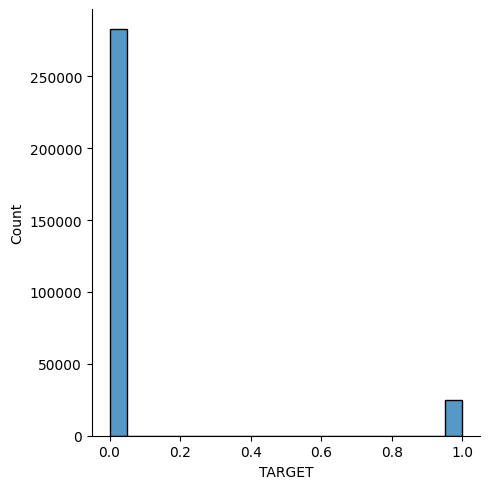

In [70]:
sns.displot(train_data["TARGET"])

Як бачимо - набір даних незбалансовано.<br> Подивимося на розподіл характеристик:


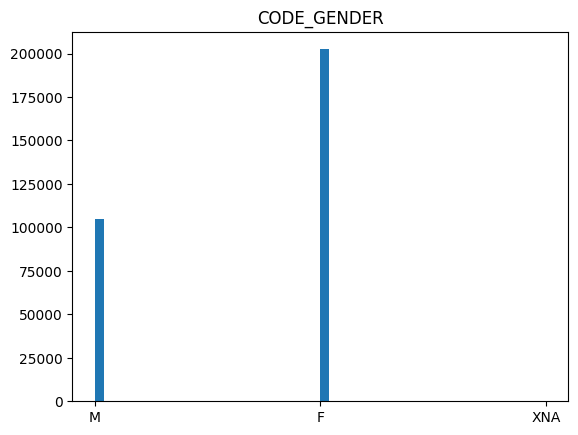

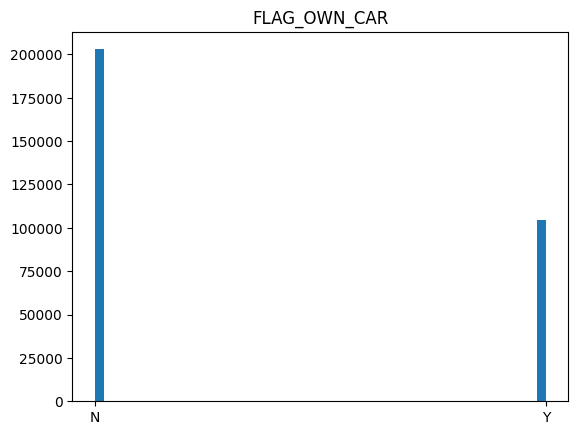

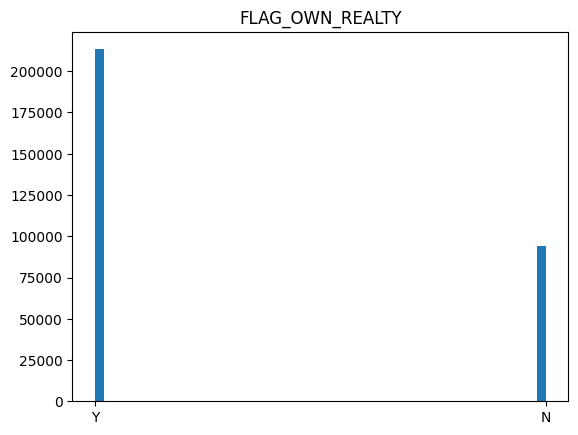

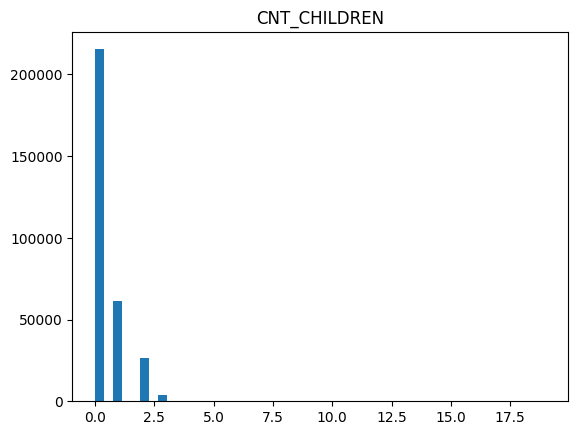

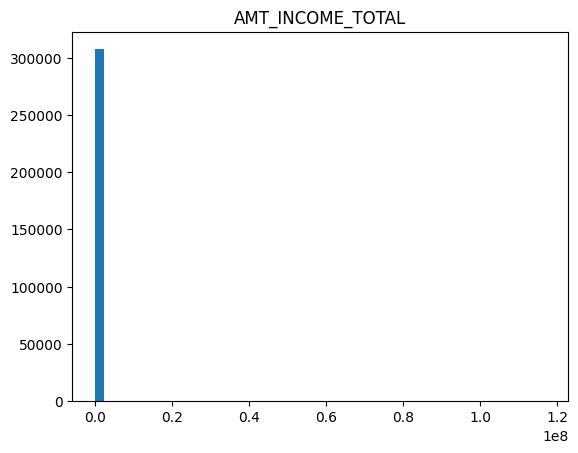

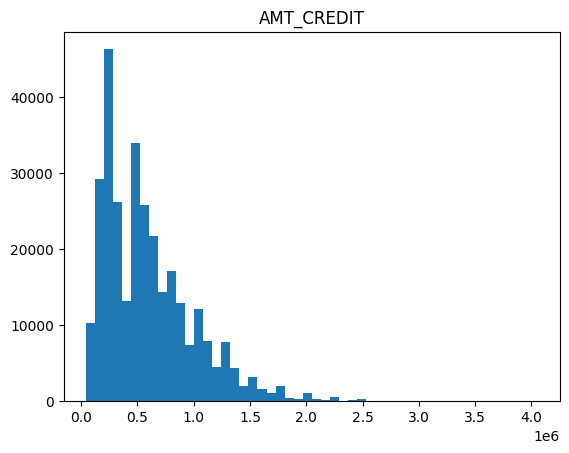

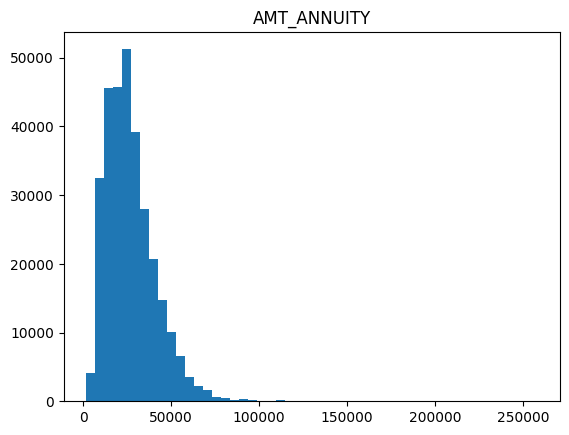

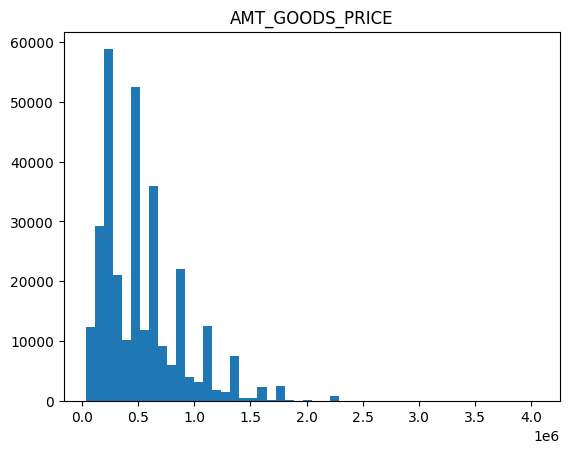

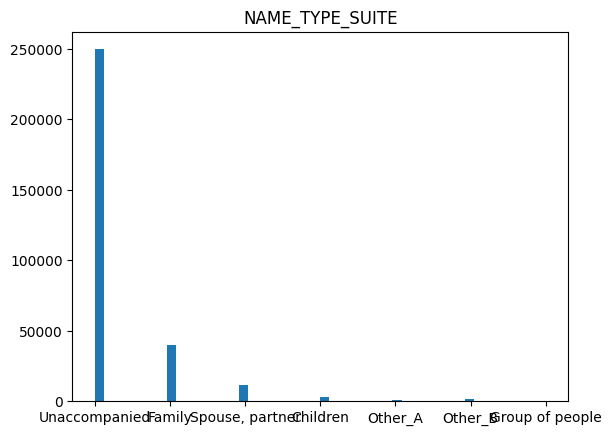

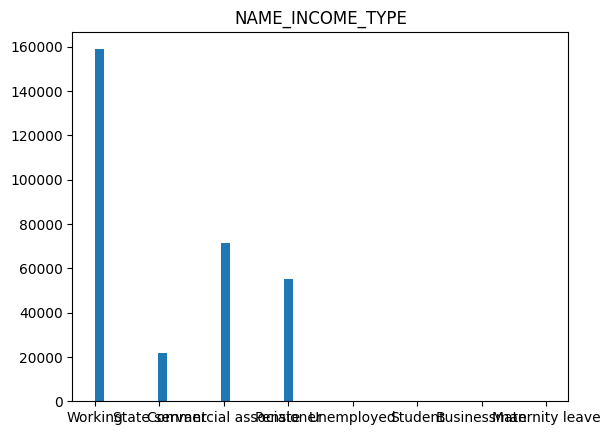

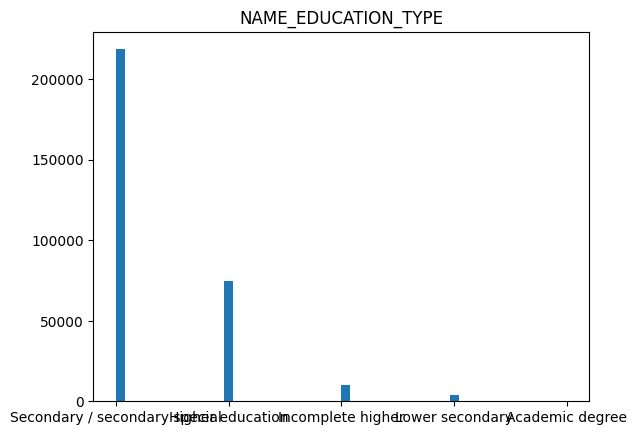

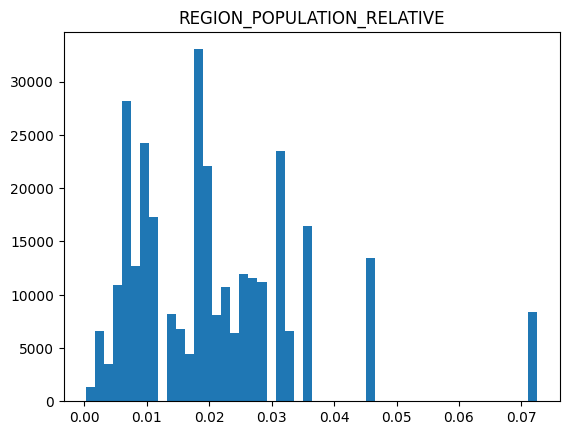

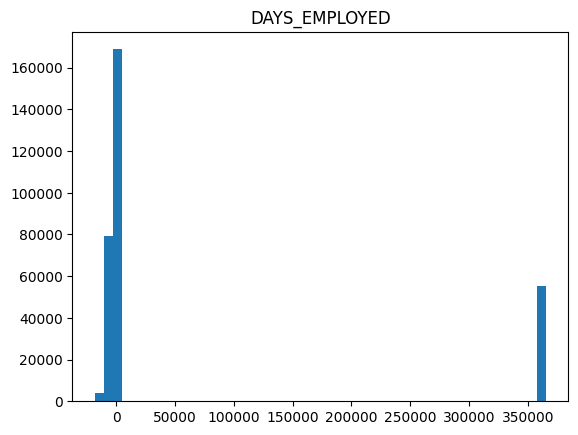

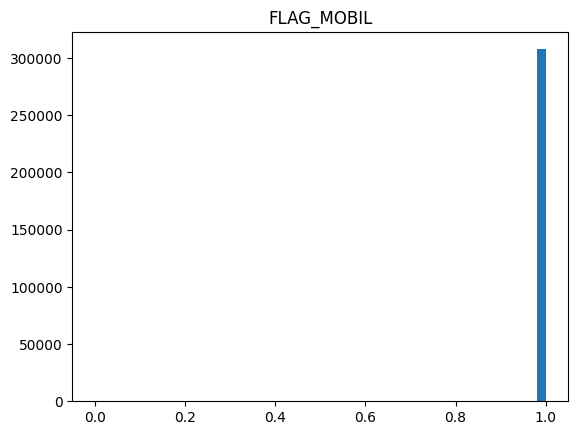

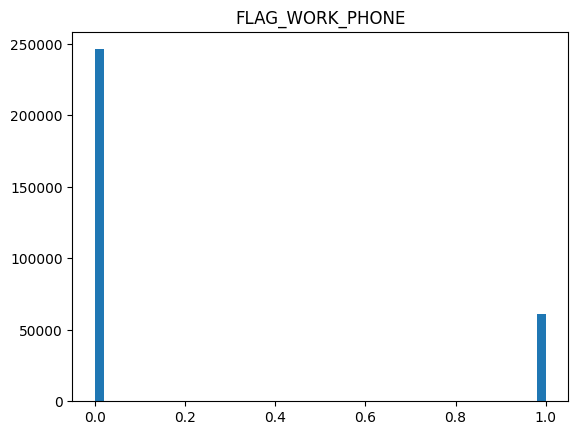

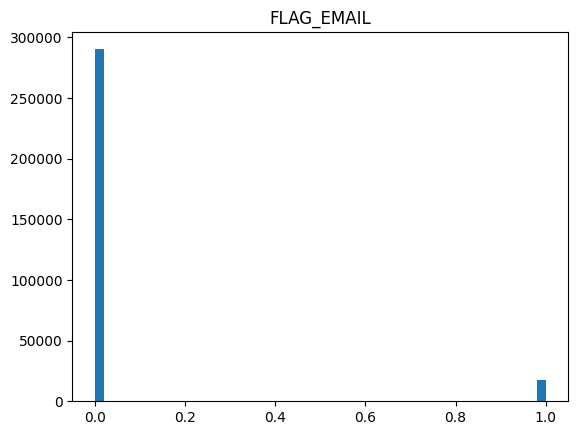

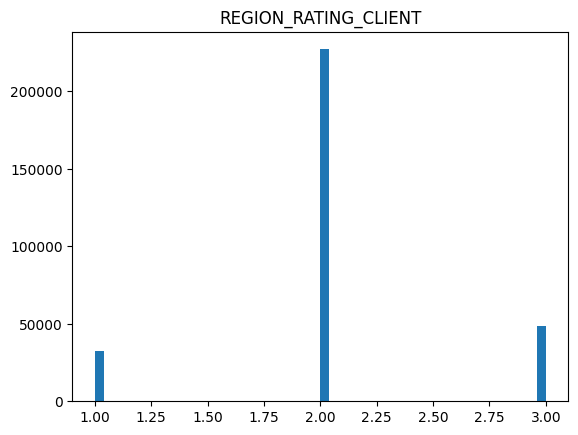

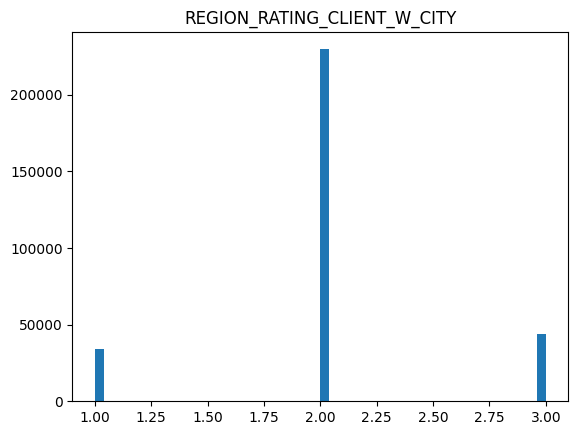

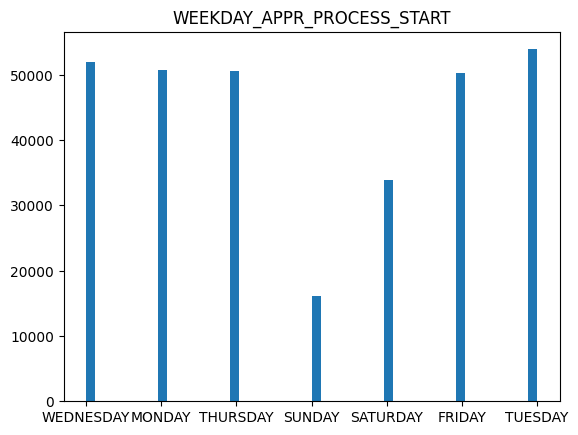

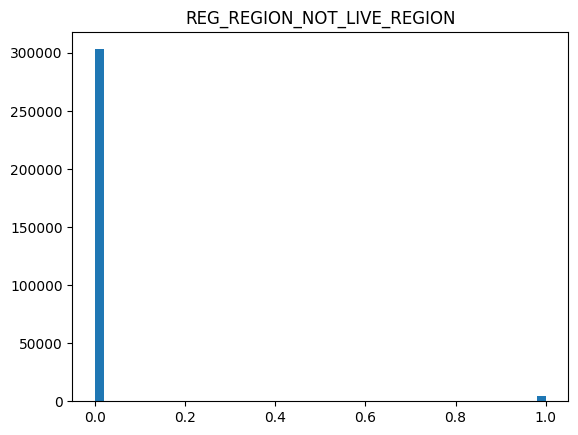

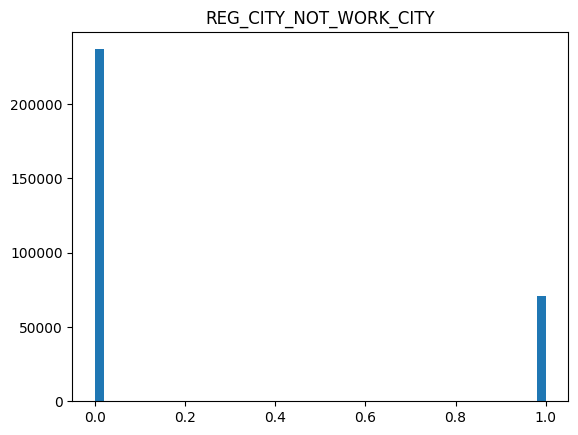

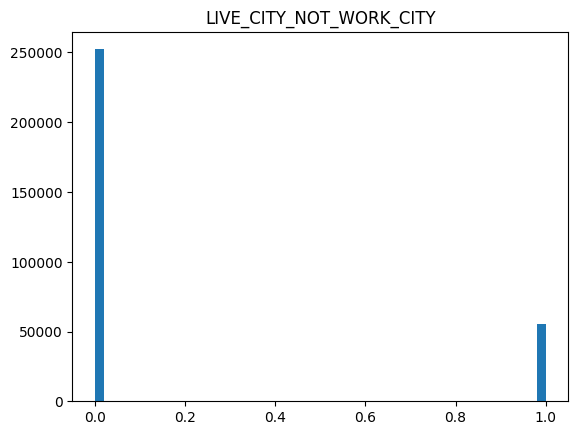

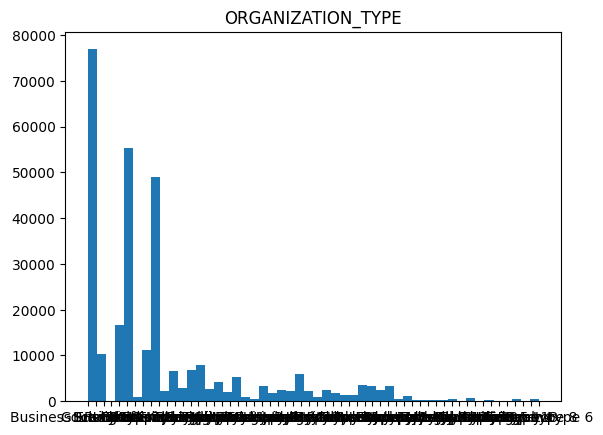

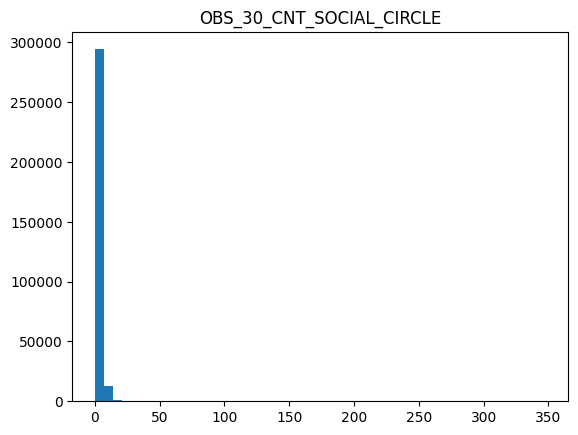

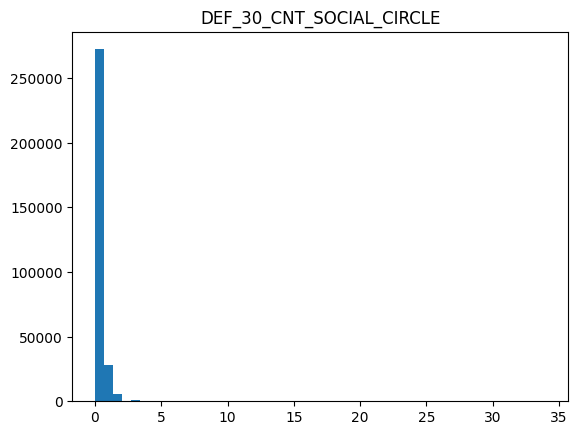

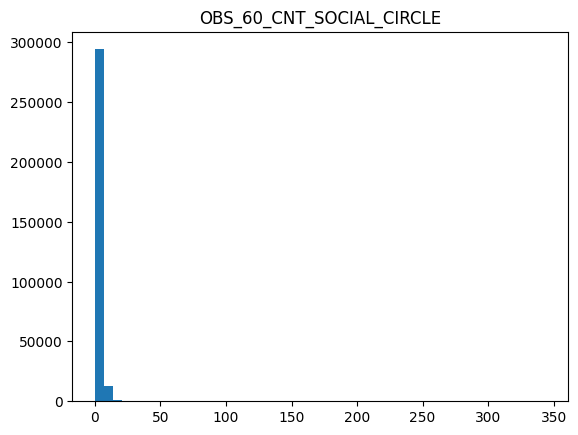

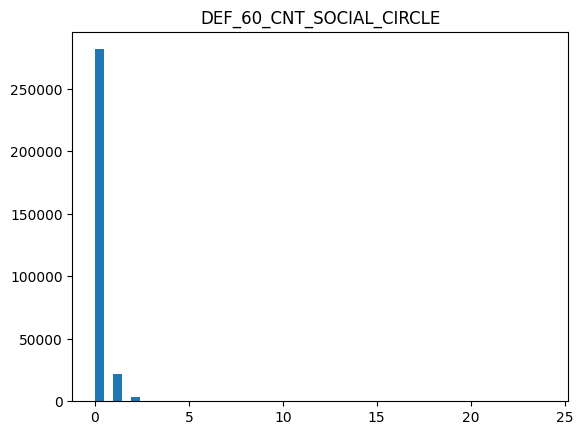

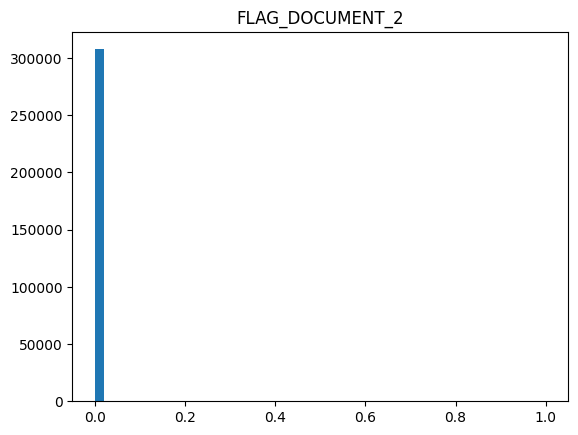

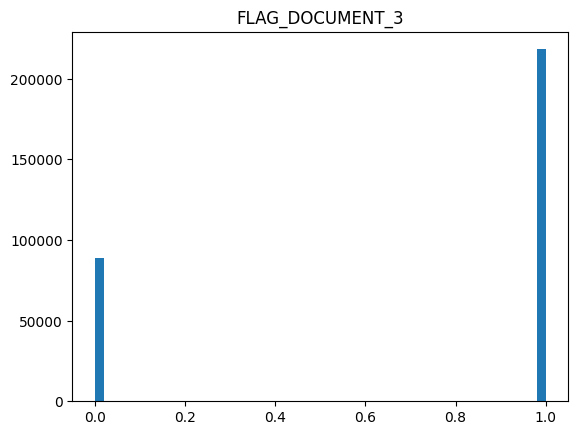

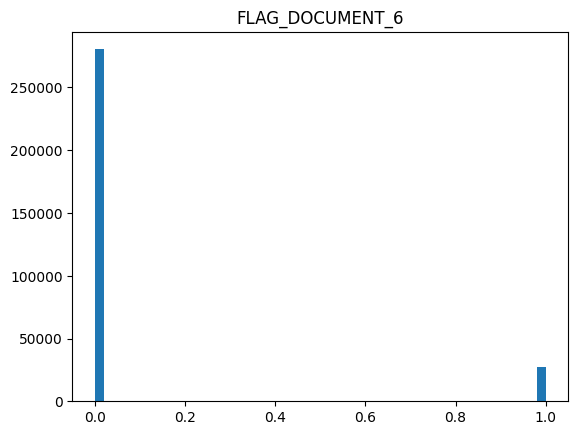

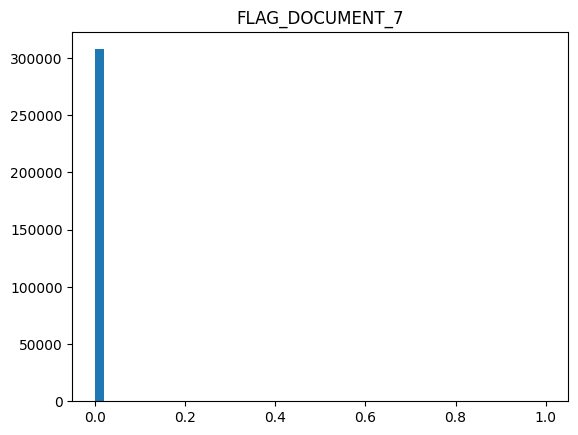

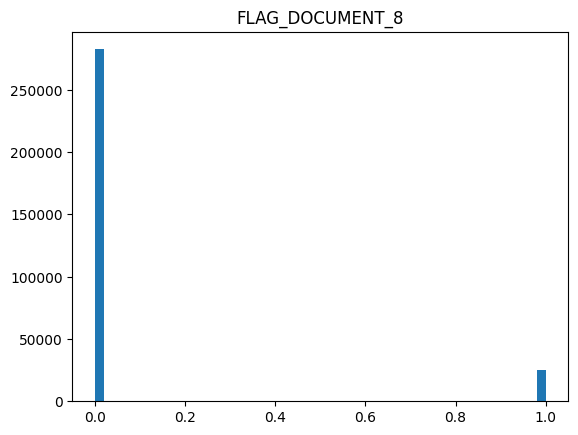

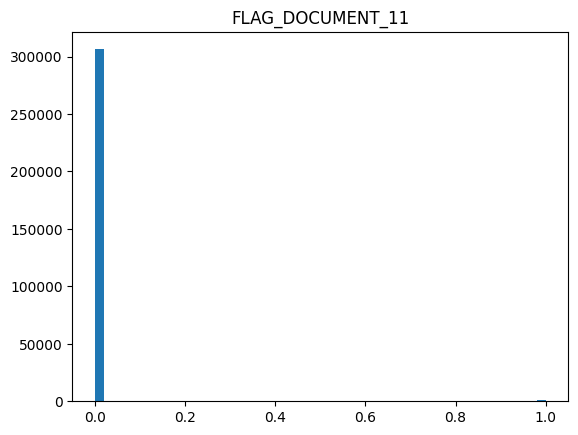

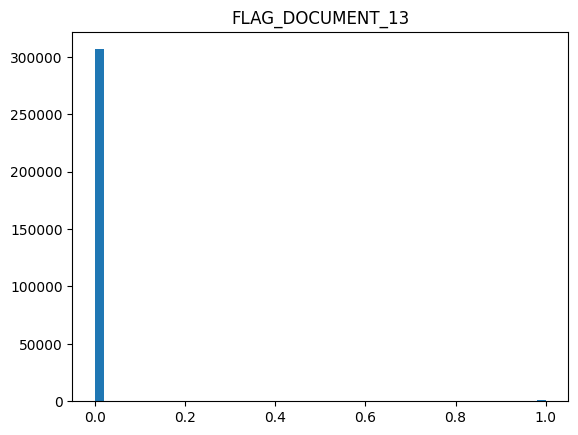

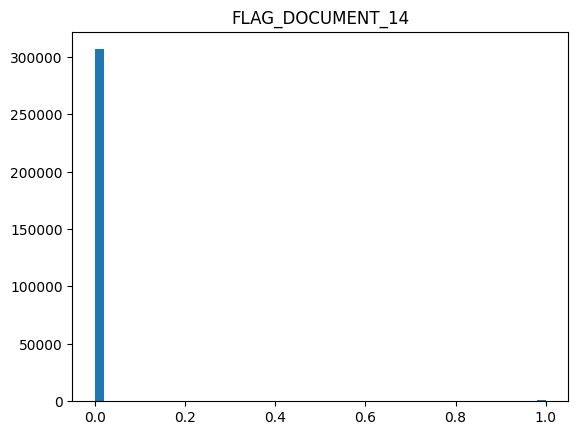

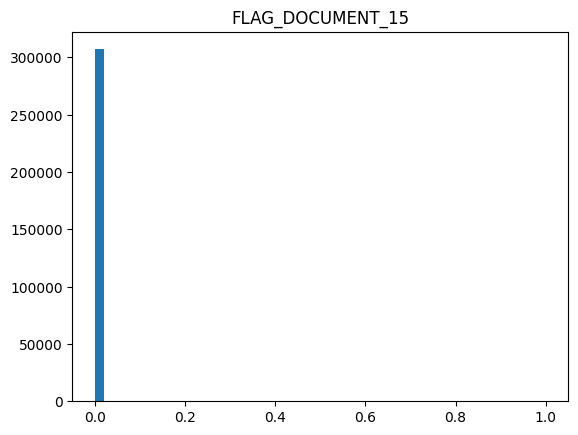

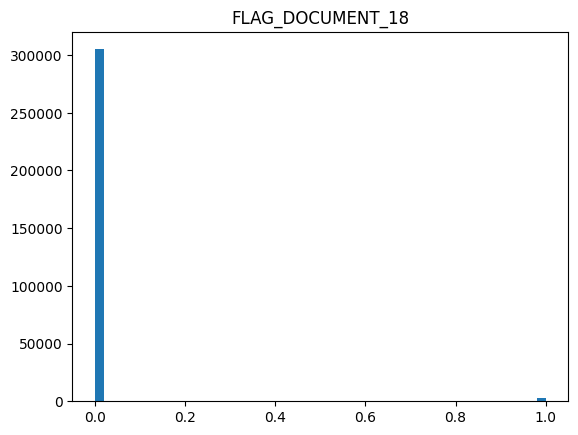

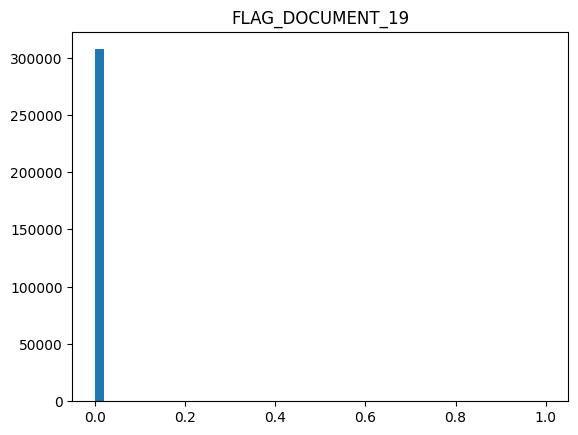

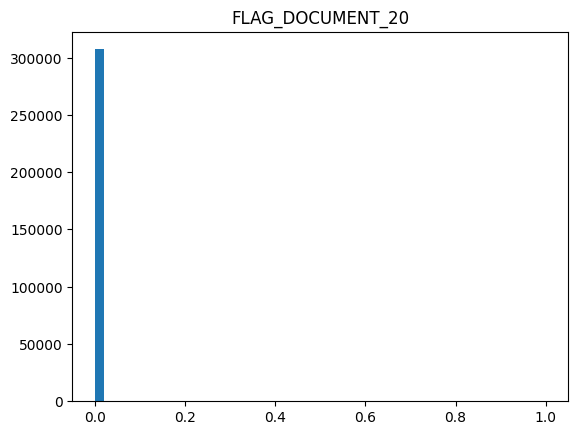

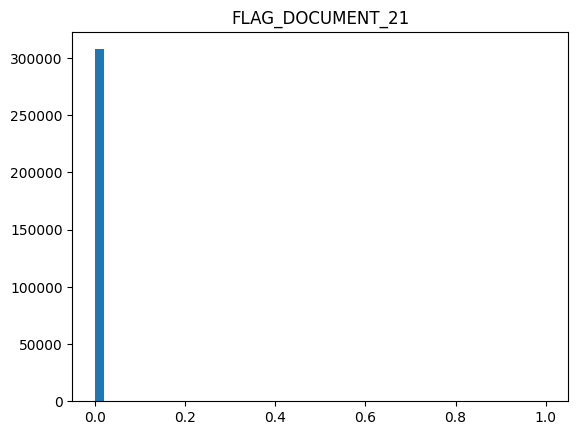

In [71]:
for column in train_data.columns:
    if column != "TARGET":
        plt.hist(train_data[column], bins=50)
        plt.title(column)
        plt.show()

Подивимось, чи впливають сильно ознаки "FLAG_OWN_CAR", "FLAG_OWN_REALTY" на TARGET:


<Figure size 640x480 with 0 Axes>

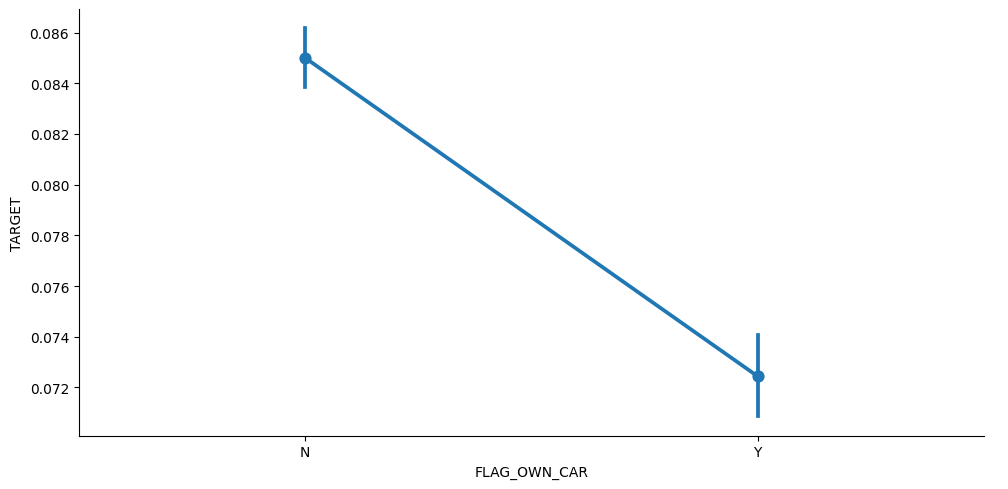

In [72]:
for i, col in enumerate(["FLAG_OWN_CAR", "FLAG_OWN_REALTY"]):
    plt.figure(i)
    sns.catplot(
        x=col,
        y="TARGET",
        data=train_data,
        kind="point",
        aspect=2,
    )

Подимось на розподіл категоріальних даних:


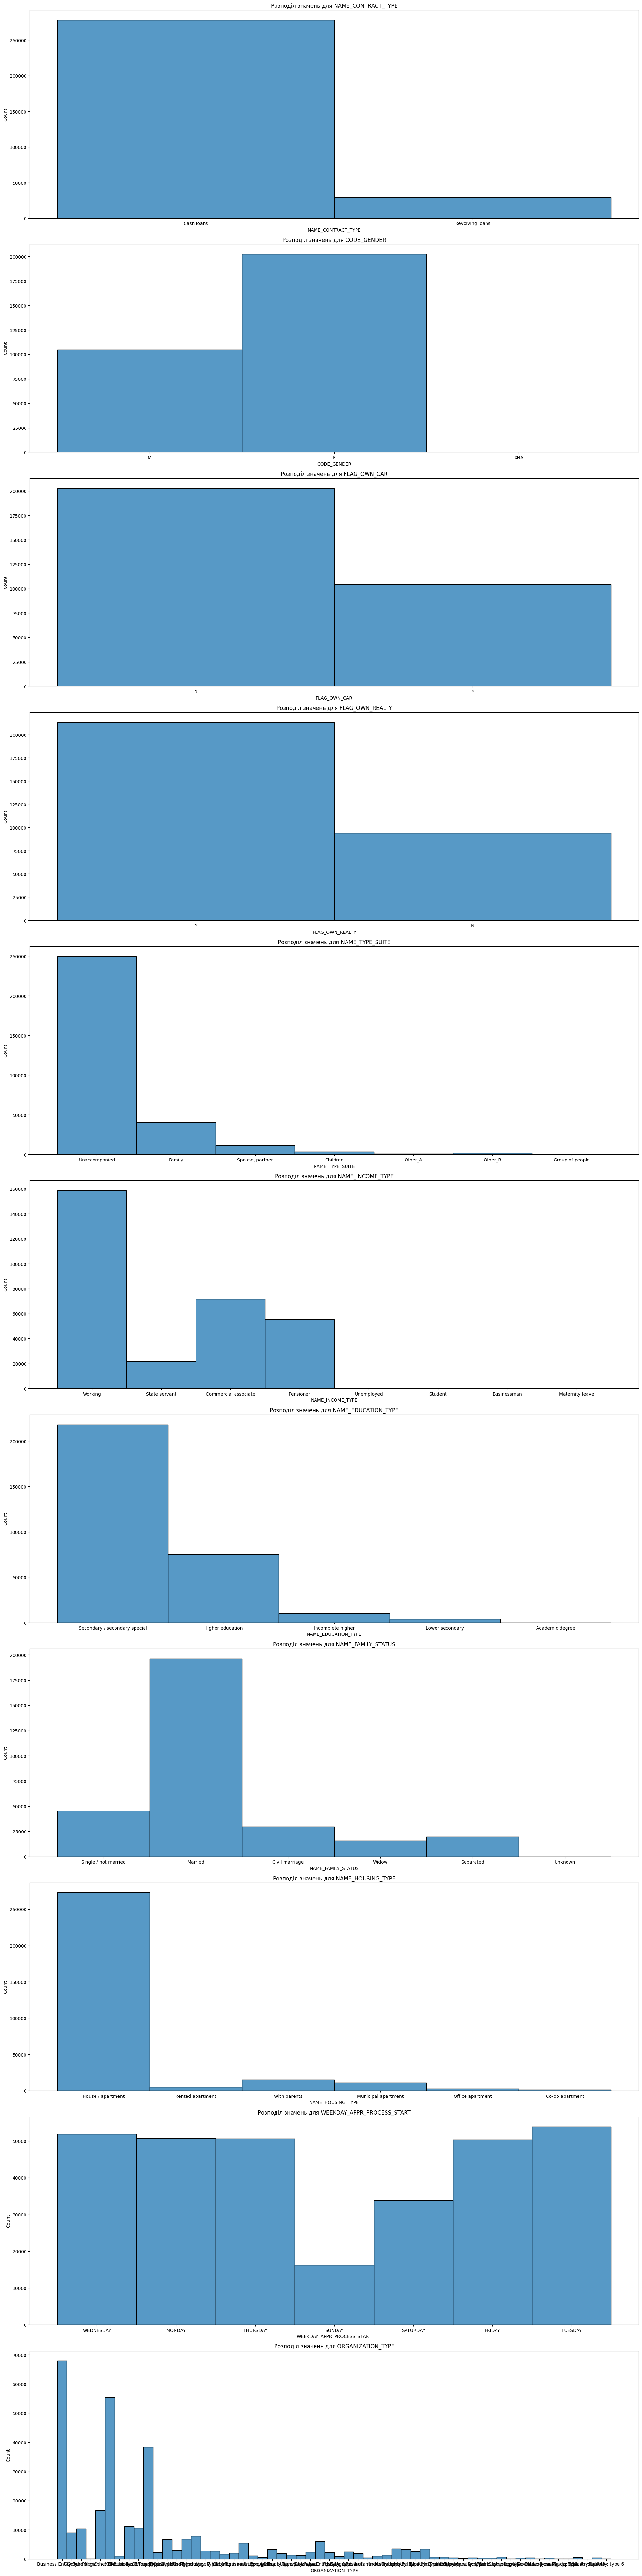

In [73]:
categorical_columns = train_data.select_dtypes(exclude=["float64", "int64"]).columns

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(20, 80))

for i, col in enumerate(categorical_columns):
    sns.histplot(data=train_data, x=col, kde=False, ax=axes[i])
    axes[i].set_title(f"Розподіл значень для {col}")

plt.tight_layout()
plt.show()

Подивимось на розподіл числових даних:


In [74]:
numerical_columns = train_data.select_dtypes(include=["float64", "int64"]).columns

train_data[numerical_columns].hist(figsize=(20, 20), bins=30, color="blue", alpha=0.7)

plt.suptitle("Розподіл числових змінних", y=1.02, fontsize=16)
plt.show()

Перевіримо різницю між тренувальним і тестовим наборами даних:


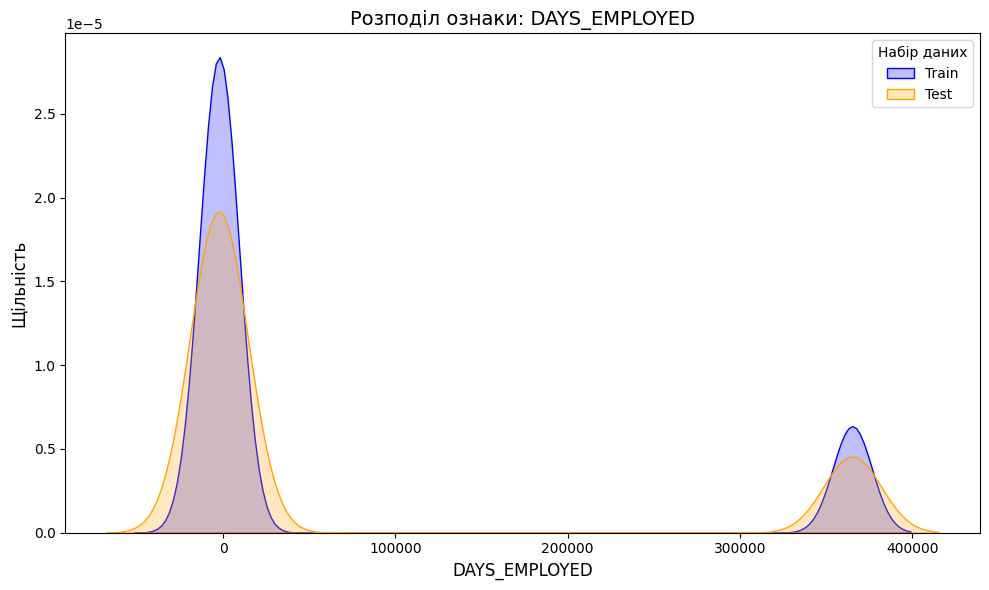

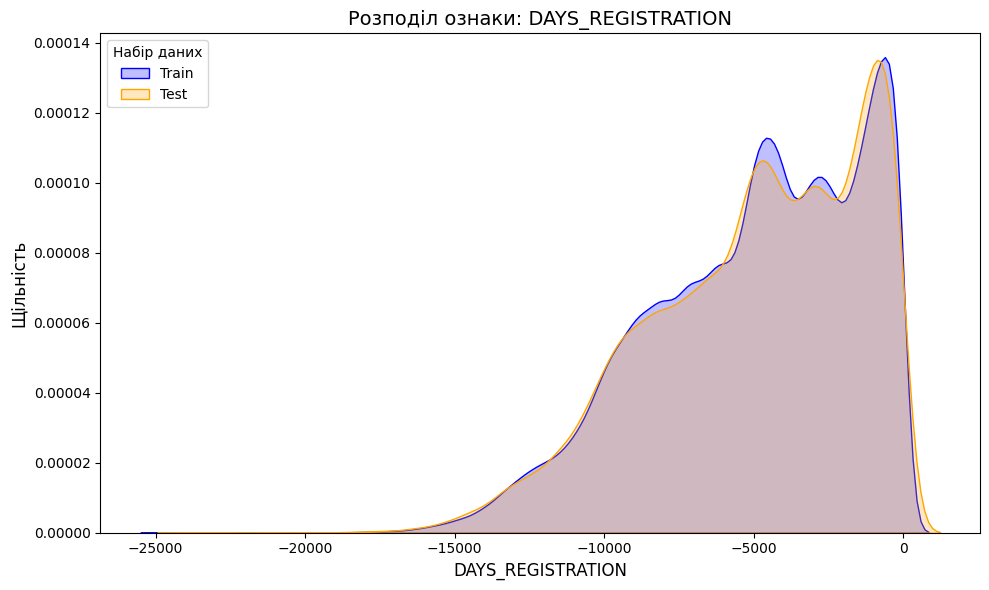

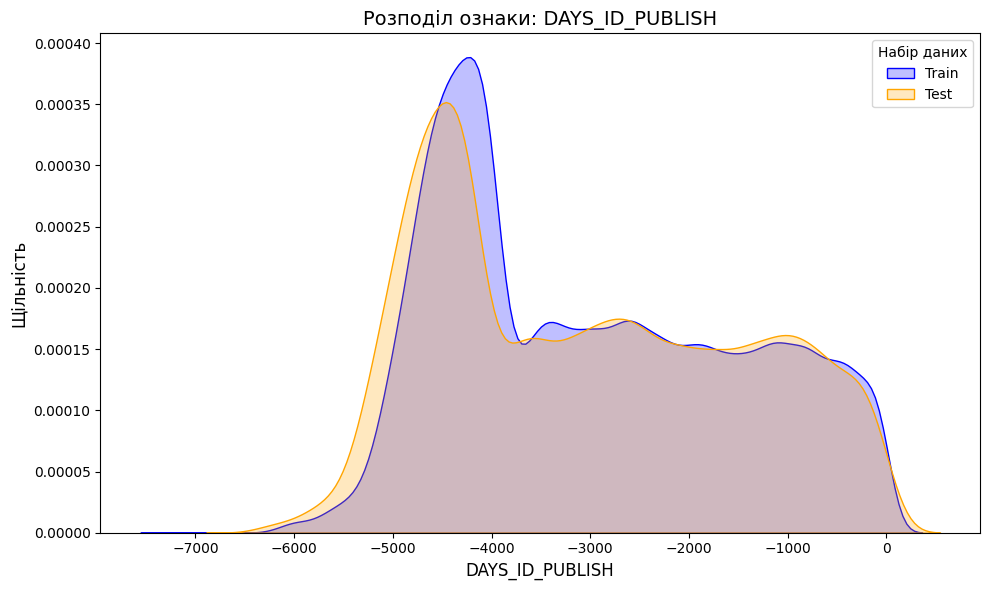

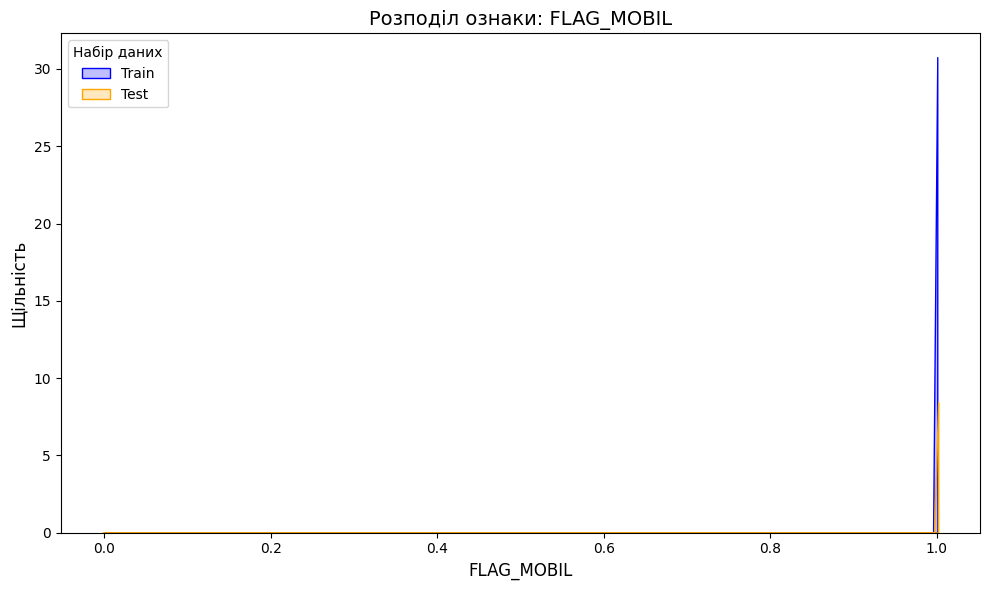

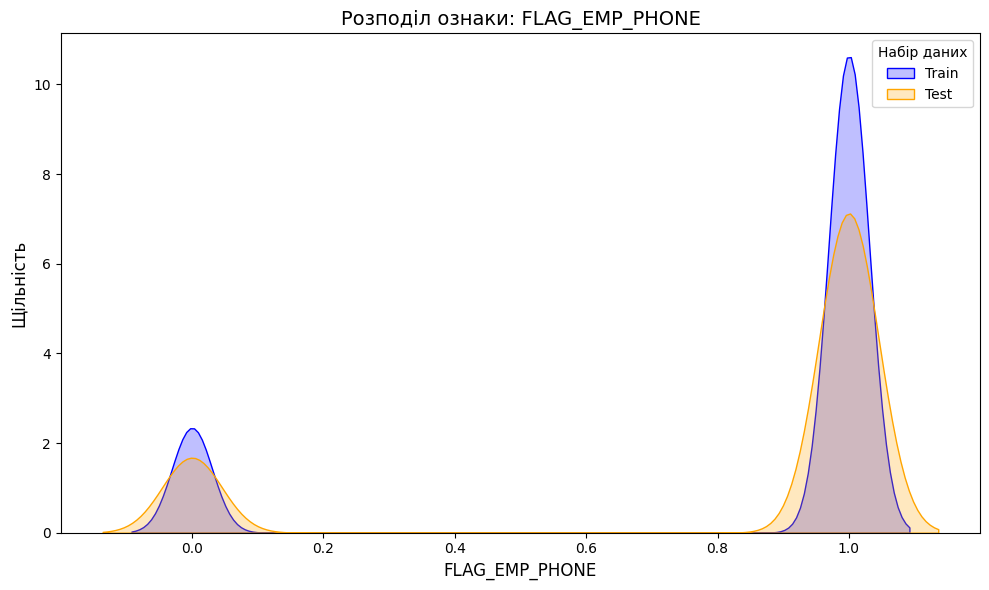

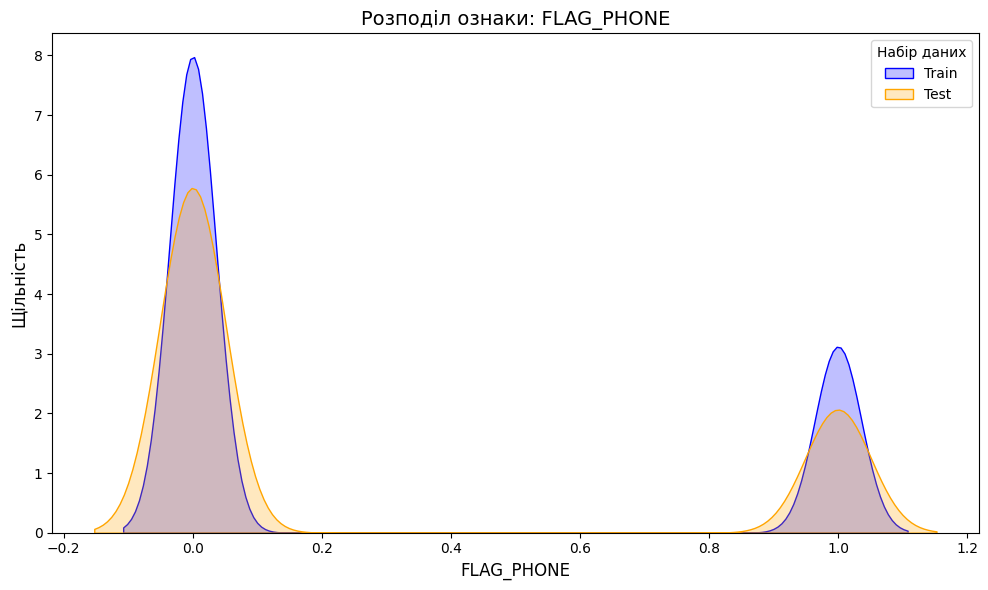

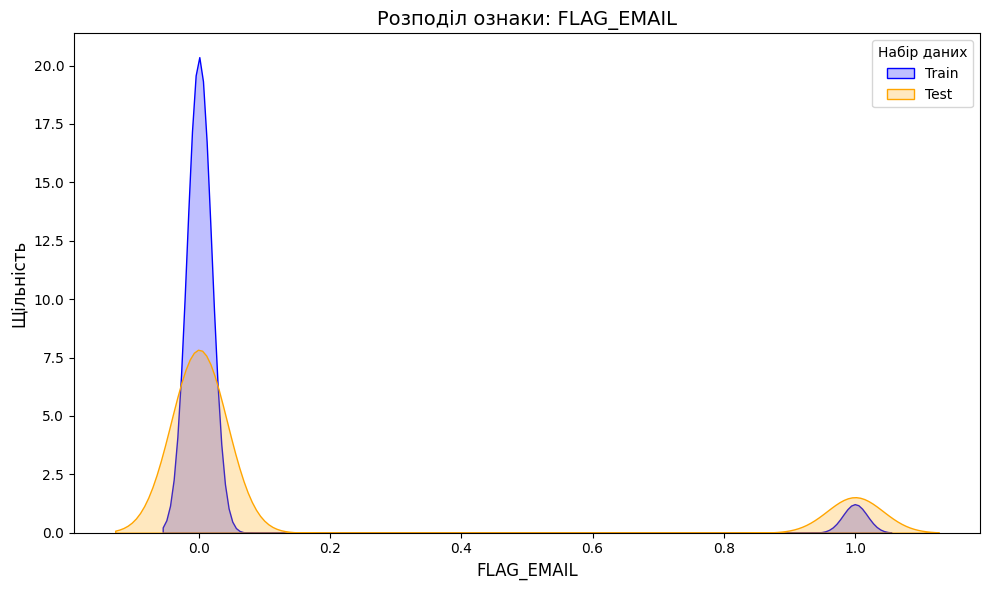

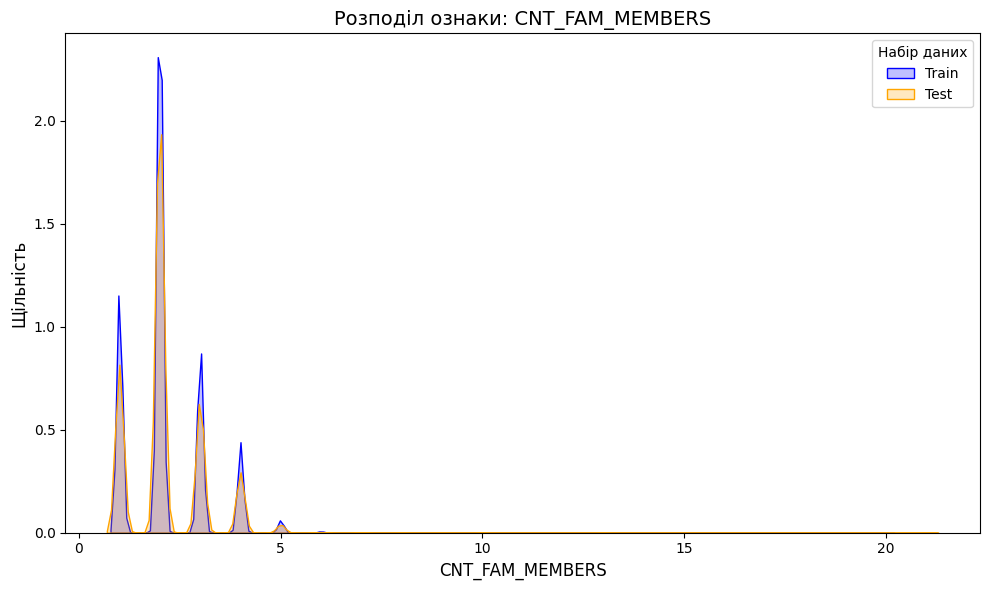

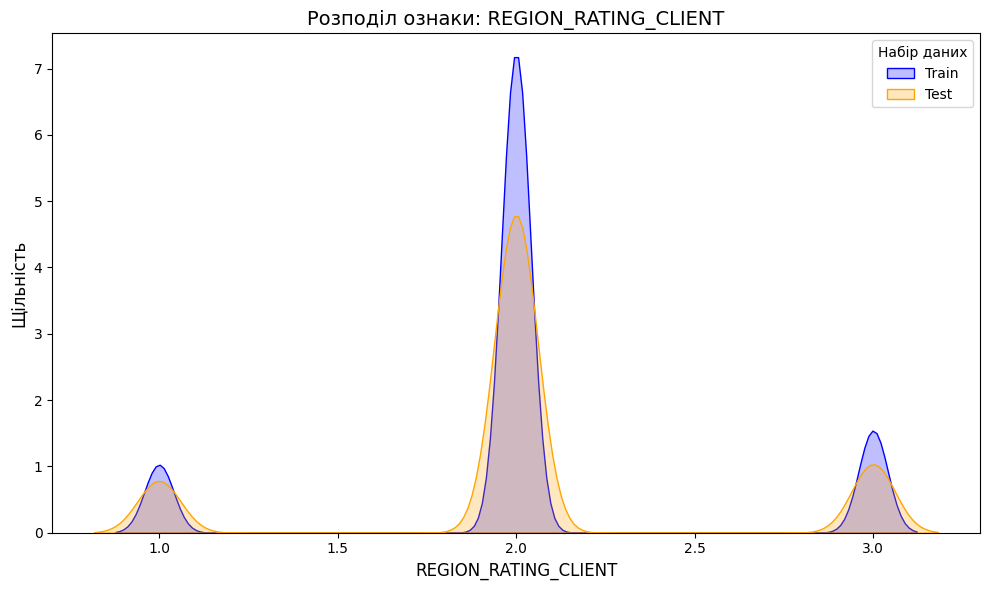

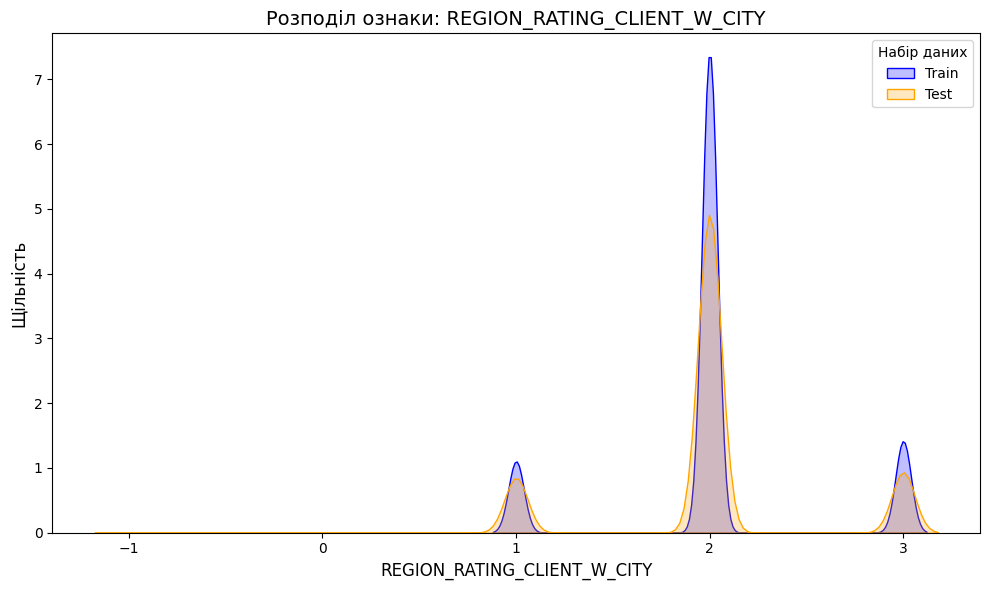

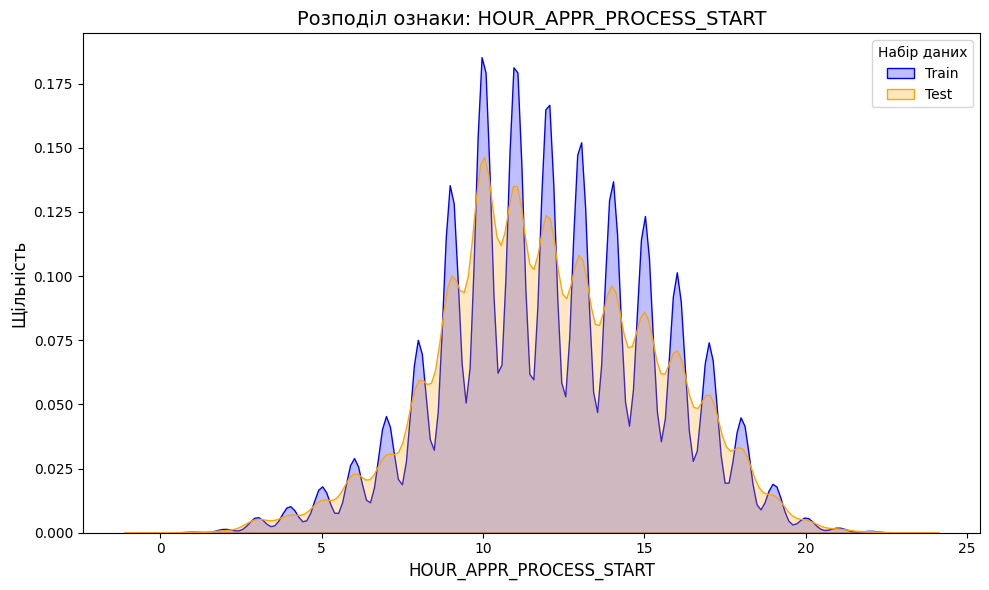

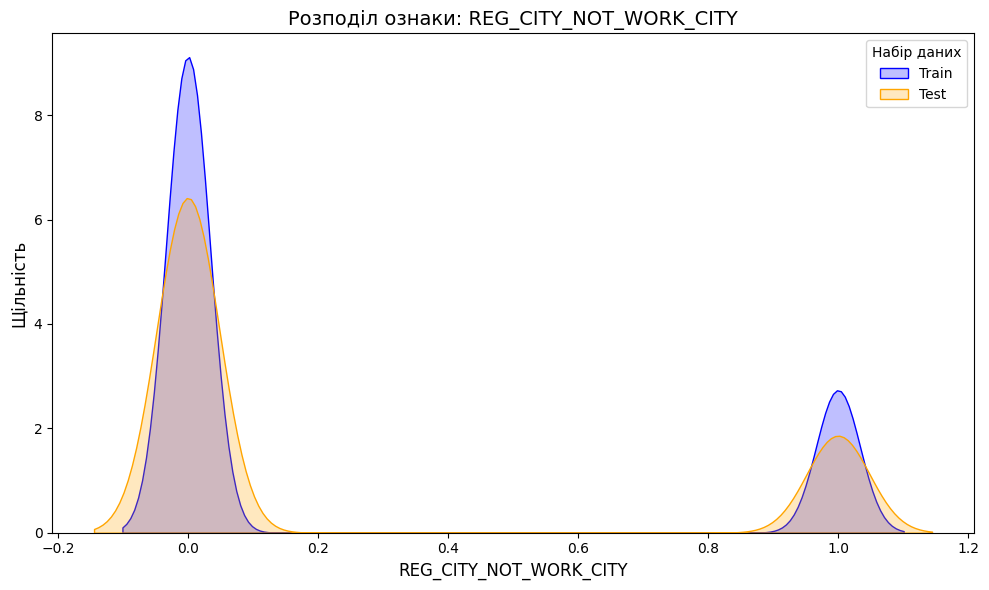

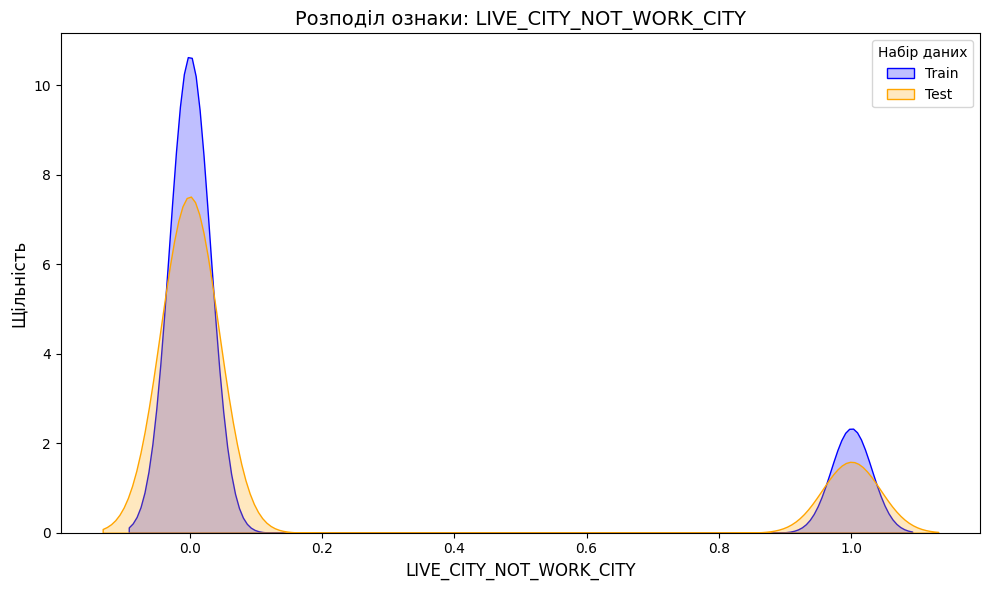

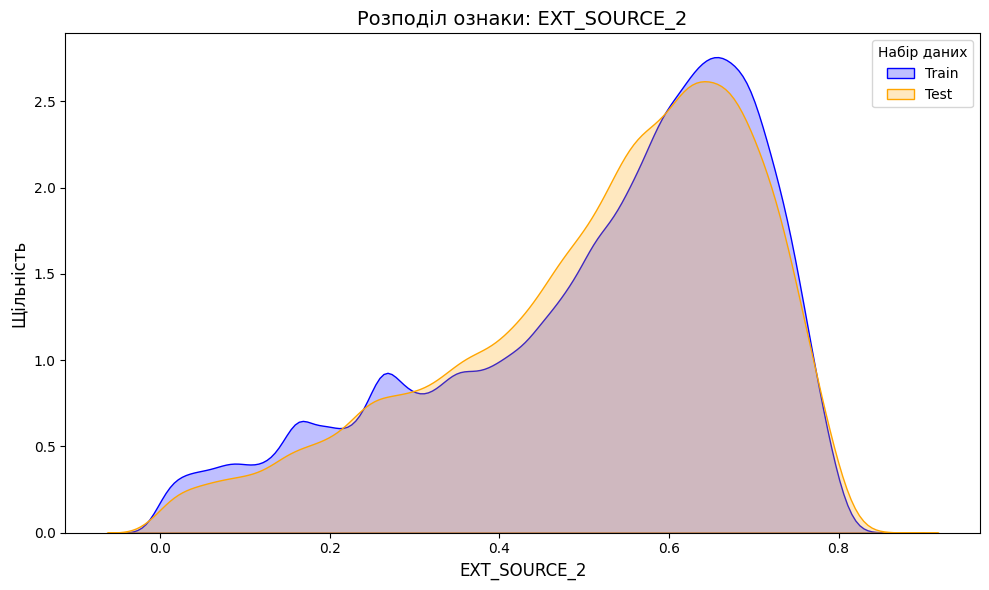

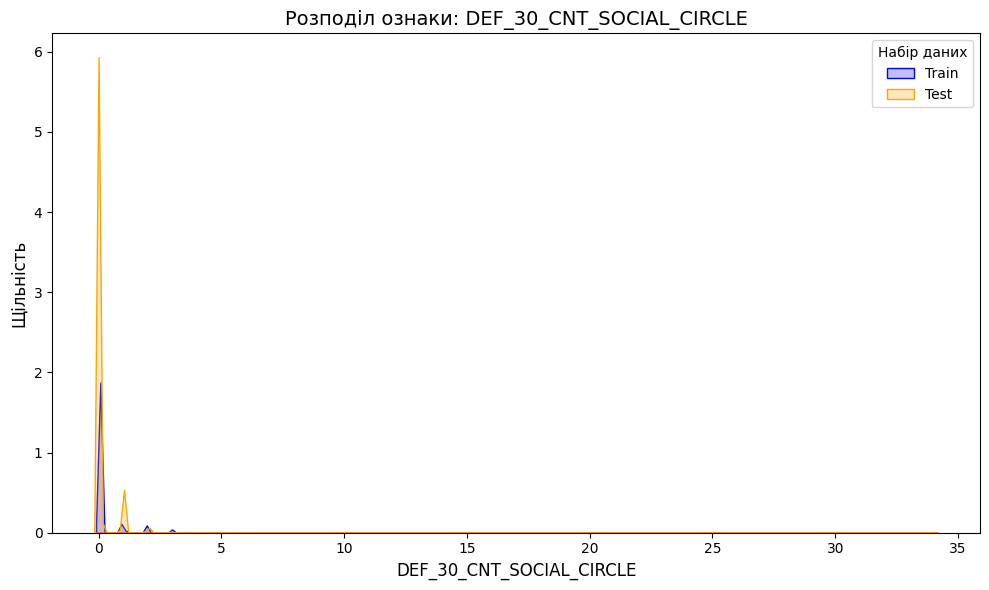

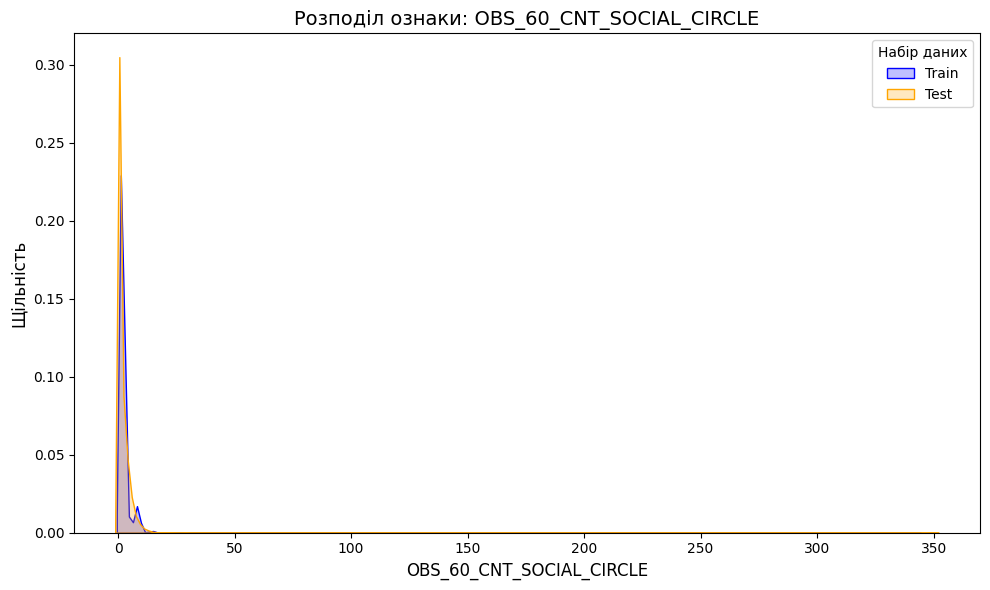

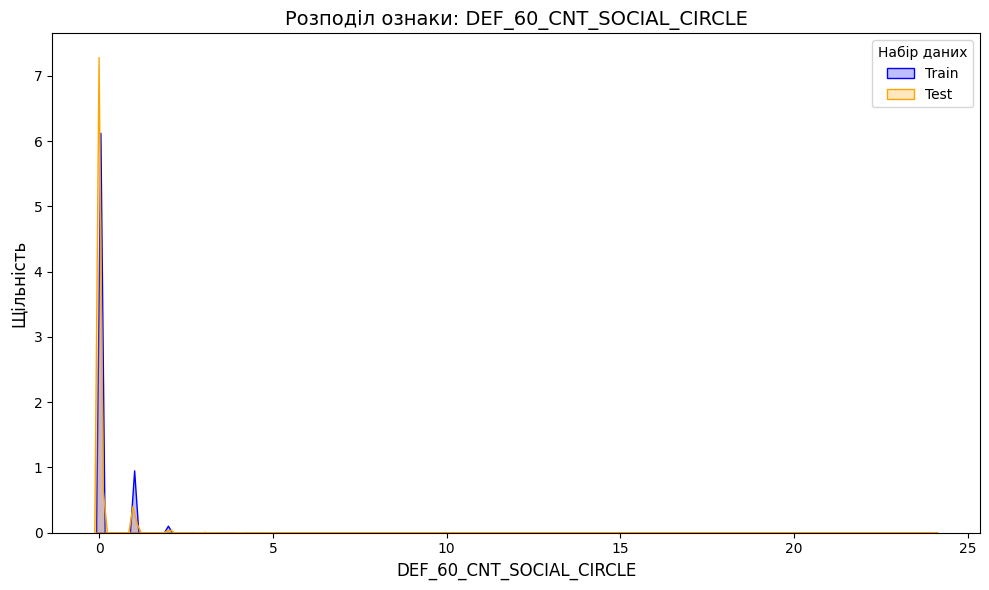

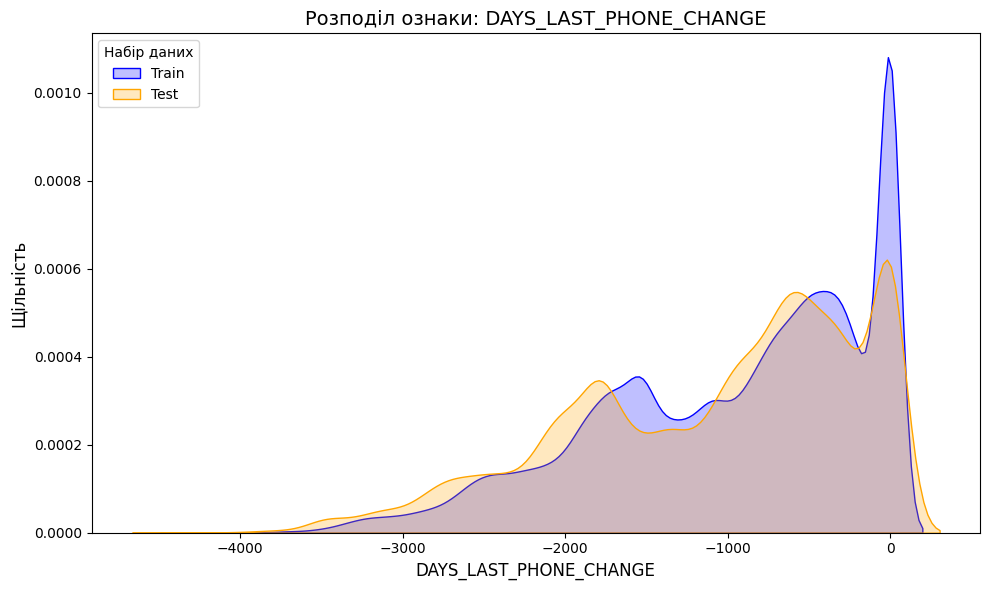

C:\Users\alext\AppData\Local\Temp\ipykernel_23224\2970946922.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=test_data[feature], label="Test", fill=True, color="orange")


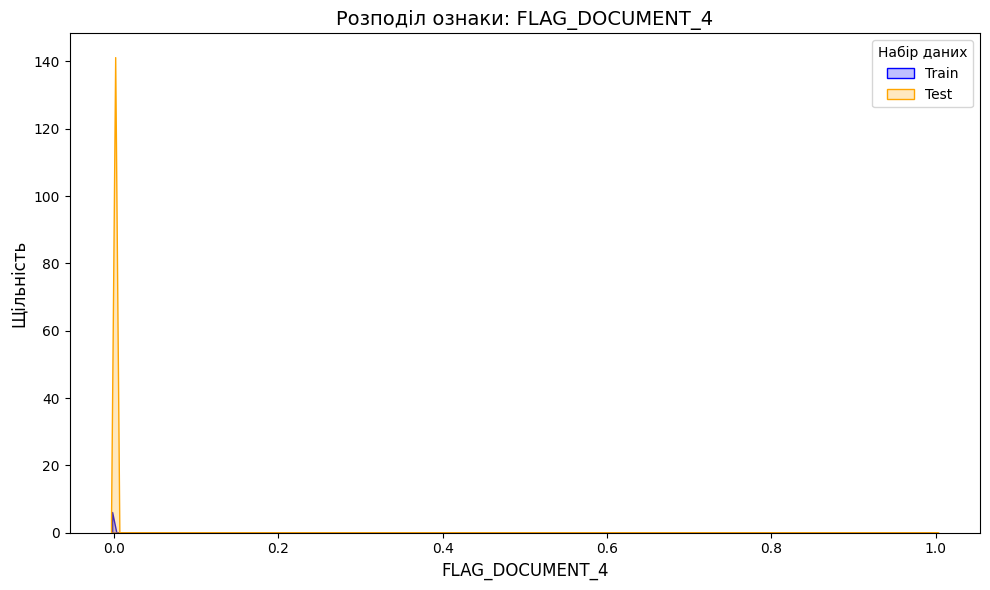

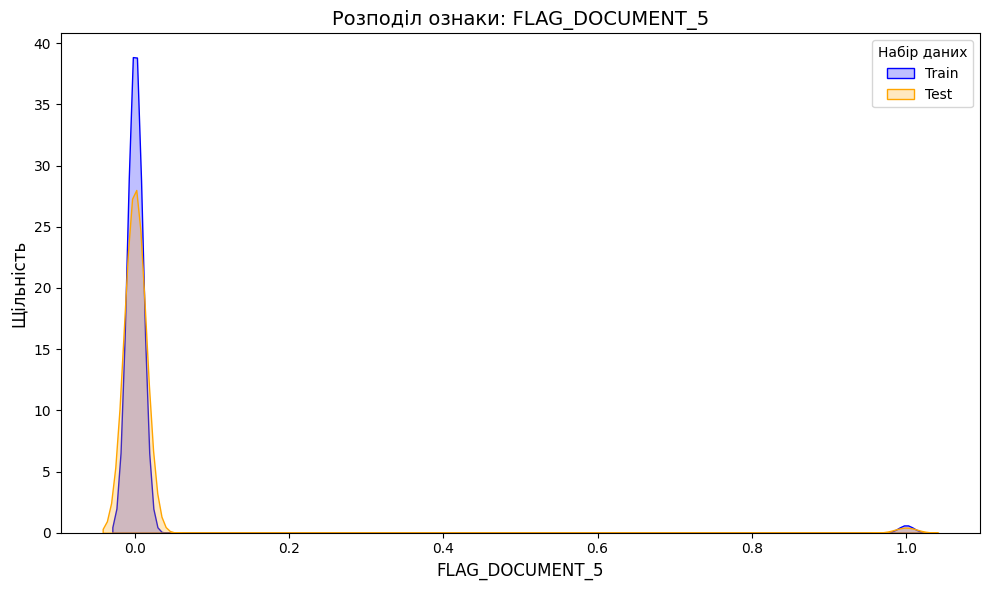

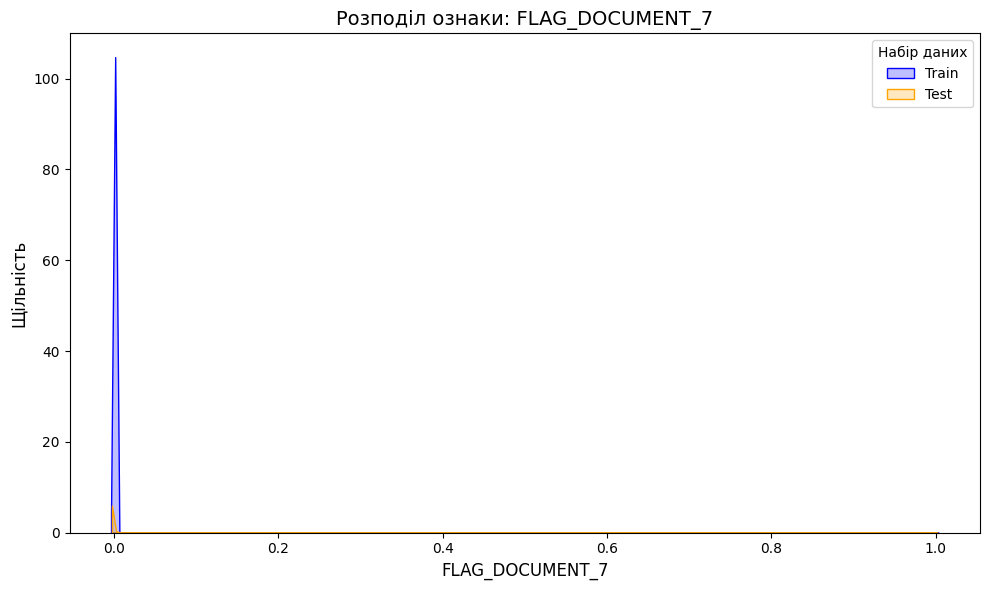

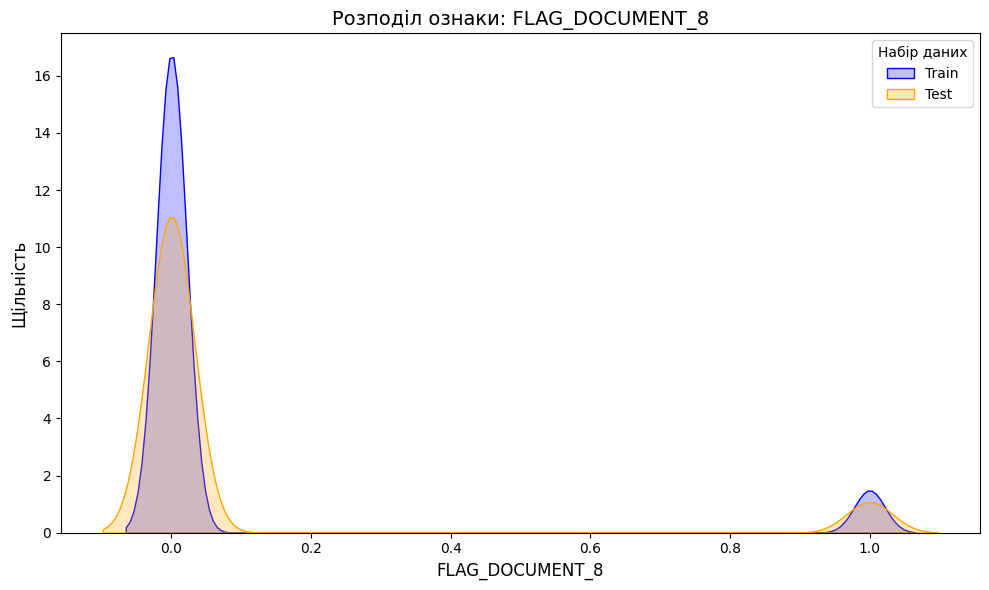

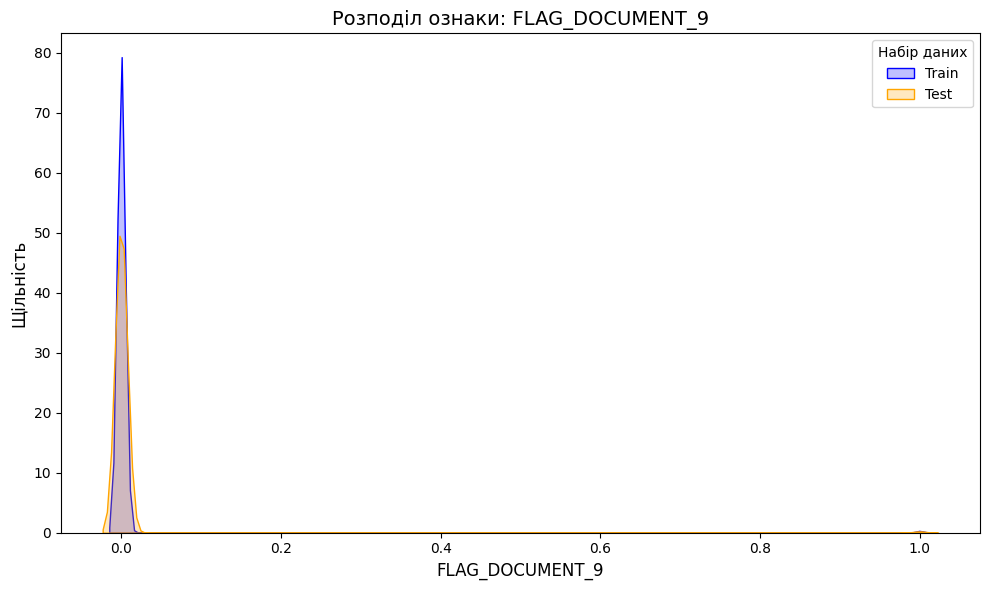

C:\Users\alext\AppData\Local\Temp\ipykernel_23224\2970946922.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=test_data[feature], label="Test", fill=True, color="orange")


C:\Users\alext\AppData\Local\Temp\ipykernel_23224\2970946922.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=test_data[feature], label="Test", fill=True, color="orange")


C:\Users\alext\AppData\Local\Temp\ipykernel_23224\2970946922.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=test_data[feature], label="Test", fill=True, color="orange")


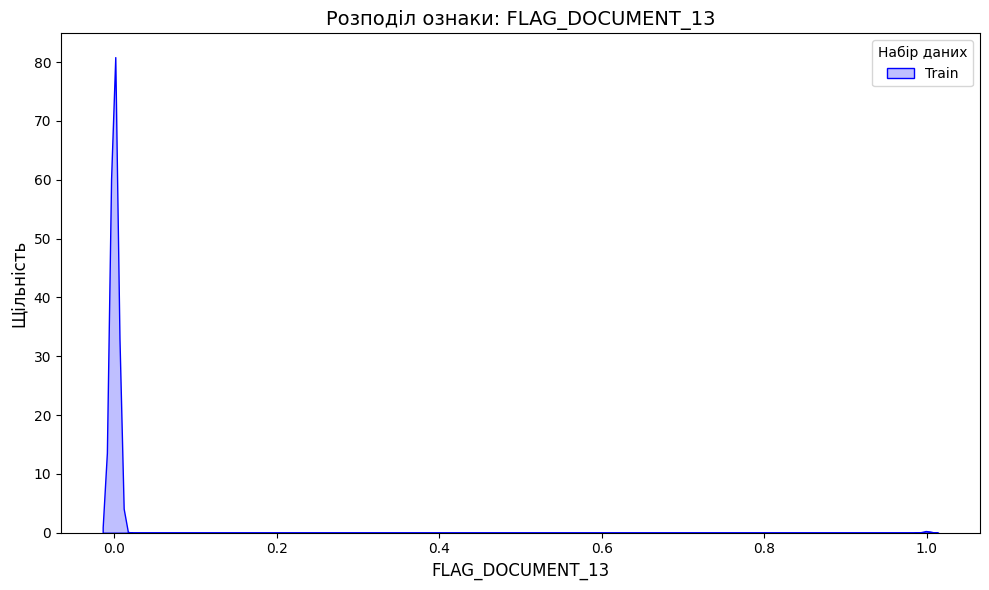

C:\Users\alext\AppData\Local\Temp\ipykernel_23224\2970946922.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=test_data[feature], label="Test", fill=True, color="orange")


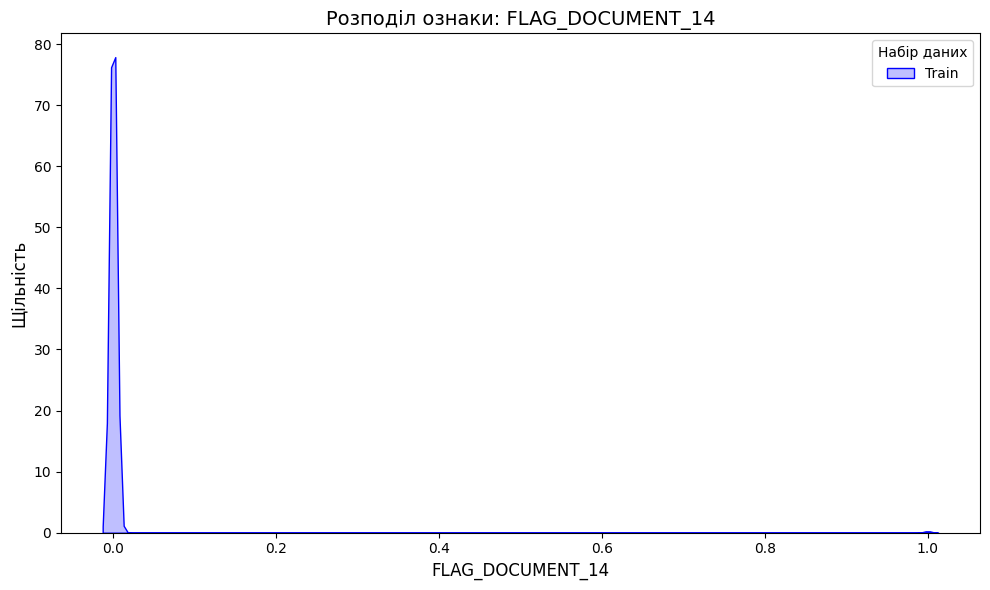

C:\Users\alext\AppData\Local\Temp\ipykernel_23224\2970946922.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=test_data[feature], label="Test", fill=True, color="orange")


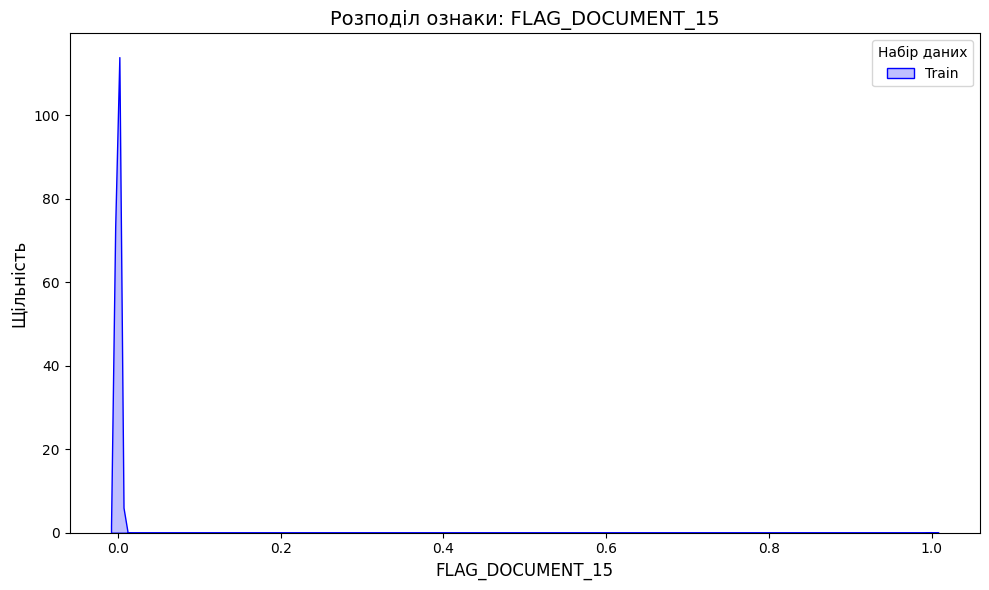

C:\Users\alext\AppData\Local\Temp\ipykernel_23224\2970946922.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=test_data[feature], label="Test", fill=True, color="orange")


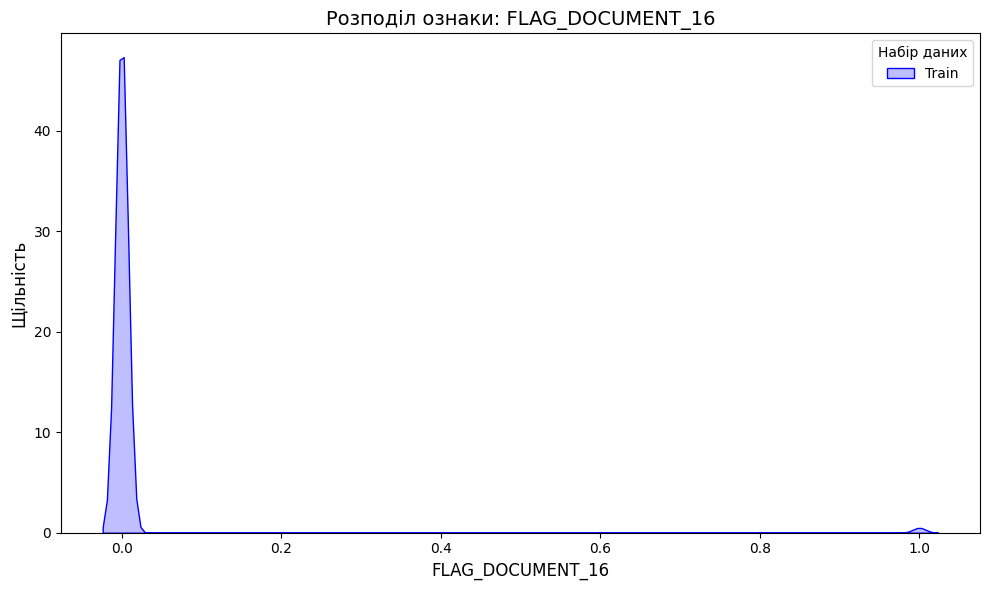

C:\Users\alext\AppData\Local\Temp\ipykernel_23224\2970946922.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=test_data[feature], label="Test", fill=True, color="orange")


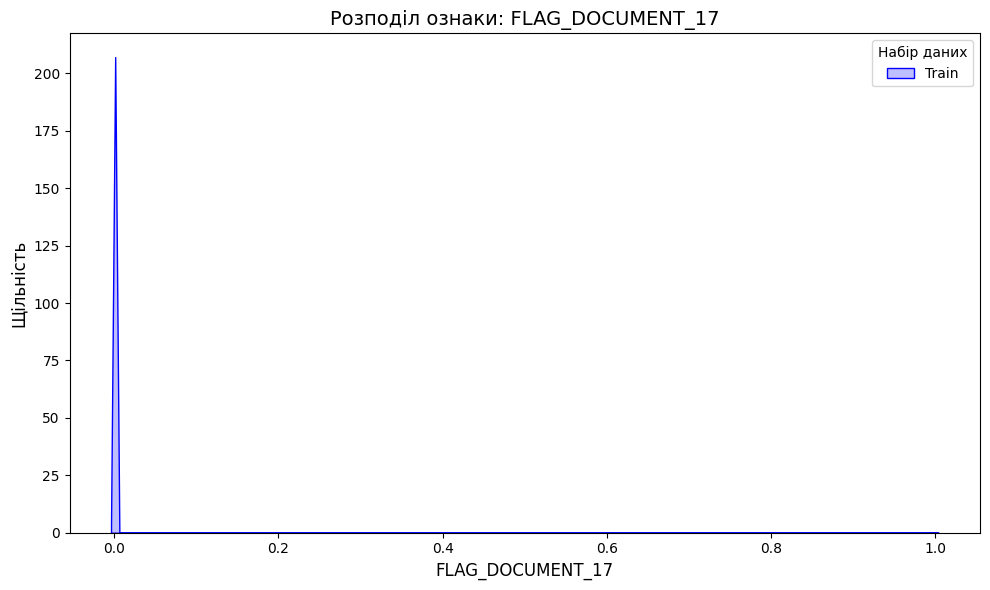

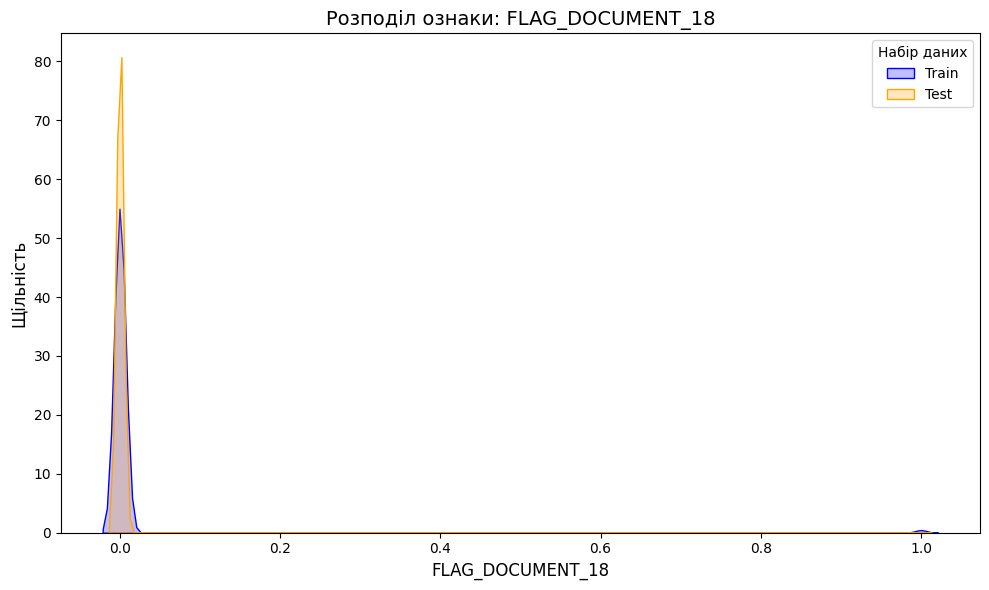

C:\Users\alext\AppData\Local\Temp\ipykernel_23224\2970946922.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=test_data[feature], label="Test", fill=True, color="orange")


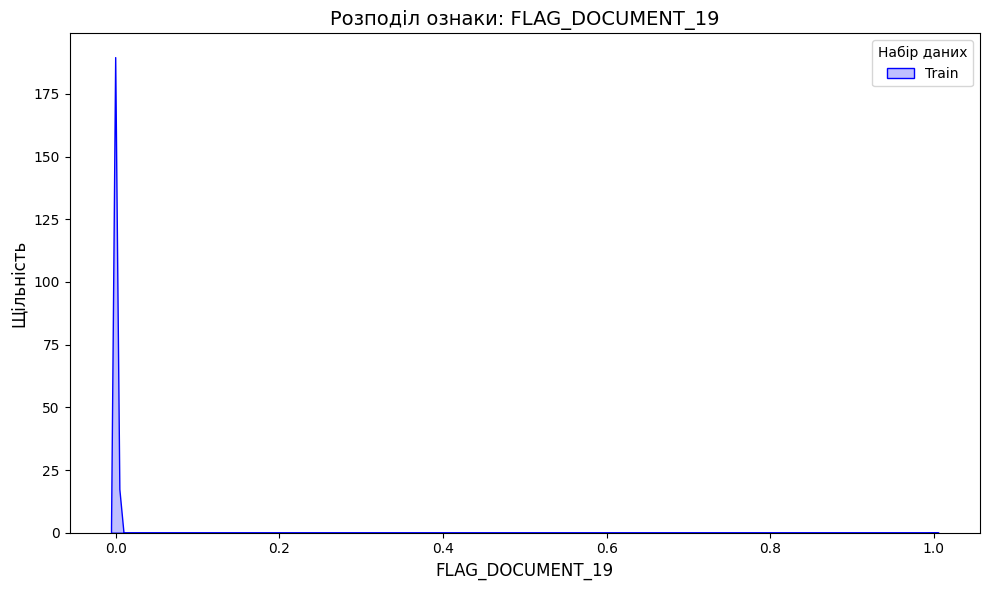

C:\Users\alext\AppData\Local\Temp\ipykernel_23224\2970946922.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=test_data[feature], label="Test", fill=True, color="orange")


C:\Users\alext\AppData\Local\Temp\ipykernel_23224\2970946922.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=test_data[feature], label="Test", fill=True, color="orange")


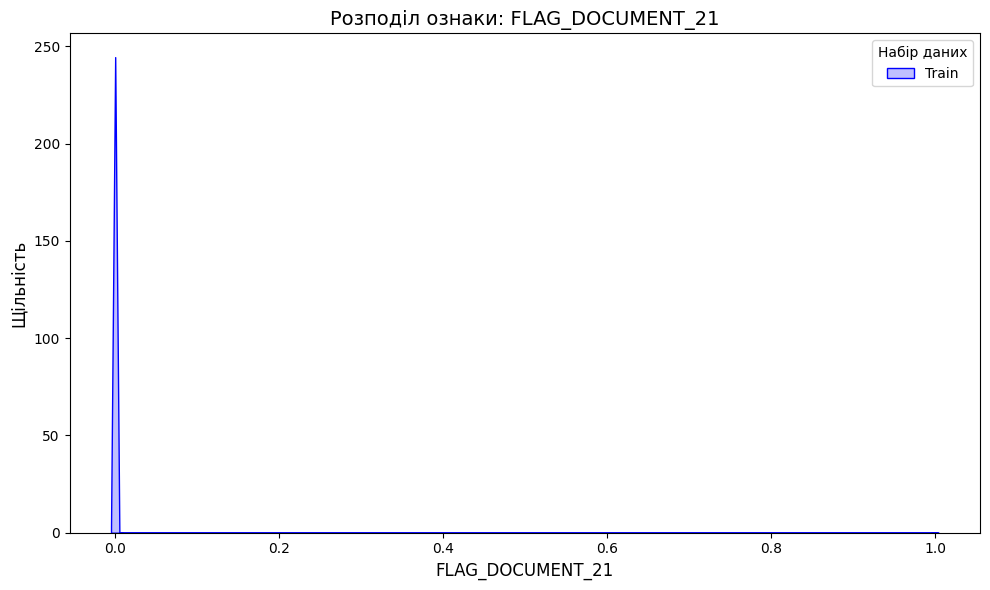

In [75]:
for feature in numerical_columns:
    if feature != "TARGET":
        plt.figure(figsize=(10, 6))

        sns.kdeplot(data=train_data[feature], label="Train", fill=True, color="blue")
        sns.kdeplot(data=test_data[feature], label="Test", fill=True, color="orange")

        plt.title(f"Розподіл ознаки: {feature}", fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Щільність", fontsize=12)
        plt.legend(title="Набір даних")

        plt.tight_layout()
        plt.show()

Побудуємо класифікатор на основі проаналізованих даних.
Підключимо потрібні бібліотеки:


In [76]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

Попередня обробка даних (preprocessing).
Для категоріальних даних було використано OneHotEncoder, для числових StandardScaler, який приводить числові дані до стандартного нормального розподілу


In [77]:
transformer = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_columns),
        ("num", StandardScaler(), numerical_columns.drop("TARGET")),
    ]
)
transformer.fit(train_data)

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')),
                                ('num', StandardScaler(),
                                 Index(['SK_ID_CURR', 'CNT_CHIL...
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object'))])

Використаємо наш створений трансформер на наших даних:


In [78]:
X_train = transformer.transform(train_data.drop("TARGET", axis=1))
y_train = train_data["TARGET"]
X_test = transformer.transform(test_data)

Розділимо тренувальні дані на тренувальні дані + дані для валідації:


In [79]:
X_train_s, X_valid, y_train_s, y_valid = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)

Навчимо модель логістичної регресії:


In [80]:
clf = LogisticRegression(class_weight="balanced", max_iter=2000)
clf.fit(X_train_s, y_train_s)

LogisticRegression(class_weight='balanced', max_iter=2000)

Оцінимо модель на валідаційному наборі данних:


In [ ]:
y_pred = clf.predict(X_valid)

precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)



roc_auc = roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1])



print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1: {f1:.2f}")



print(f"roc auc: {roc_auc:.2f}")

precision: 0.14
recall: 0.64
f1: 0.24
roc auc: 0.71


Зробимо прогнози на тестових даних:


In [82]:
test_predict = clf.predict(X_test)

Збережемо результати у файл submission:


In [83]:
last = pd.read_csv("sample_submission.csv")
last["TARGET"] = test_predict
last.to_csv("last_submission.csv", index=False)

Після залиття файлу на платформу отримуємо результат:


![lab2_result.png](lab2_result.png)
